# Lab 4: Correção de Erros Quânticos: Dos Conceitos Fundamentais ao Caminho para a Computação Quântica Tolerante a Falhas

Bem-vindos ao quarto desafio de programação da Escola Global de Verão Qiskit. Este laboratório explora códigos corretores de erros, começando com códigos corretores de erros clássicos fundamentais e conceitos-chave. Em seguida, faz a transição para a Correção de Erros Quânticos (QEC) — crucial para a computação quântica tolerante a falhas — e aborda o formalismo estabilizador junto com exemplos importantes. Posteriormente, o notebook introduz arquiteturas QEC avançadas, incluindo os códigos QLDPC, Tórico e gross, com exercícios.

# Índice

- Capítulo 1: Revisão de códigos corretores de erros clássicos
  - 1.1 Códigos Clássicos [n, k, d]
  - 1.2 Distância de Hamming
  - 1.3 O Código de Repetição [3, 1, 3]
    - Prática: Decodificador baseado em tabela de consulta do Código [3,1,3]
- Capítulo 2: Códigos Corretores de Erros Quânticos [[n, k, d]]
  - 2.1 Formalismo Estabilizador
  - 2.2 Prática do Código de 3 qubits para correção de bit-flip
    - Exercício 1: Decodificador baseado em tabela de consulta do código de 3 bits
  - 2.3 Códigos CSS (Calderbank-Shor-Steane)
  - 2.4 Prática do Código Steane [[7,1,3]]
    - Exercício 2: Tabela de consulta do Código Steane [[7,1,3]]
    - Exercício 3: Detectar Erro com uma Tabela de Consulta
- Capítulo 3: Explorando Códigos Avançados de Correção de Erros Quânticos e Sua Eficiência
  - 3.1 Conceitos Fundamentais e Arquiteturas QLDPC Principais para Comparação
  - 3.2 Layout de Qubits e Convenções para os Exercícios
  - 3.3 Exercício do Código Tórico
      - Exercício 4: Encontrar as matrizes de verificação de paridade do código tórico
  - 3.4 Exercício do Código Gross
      - Exercício 5: Encontrar as matrizes de verificação de paridade do código gross
  - 3.5 Contando o Número de Qubits Lógicos
      - Exercício 6: Contar o número de lógicos para os códigos Tórico e Gross
  - 3.6 Observações finais: O poder da conectividade

## Requisitos

Para a conclusão bem-sucedida deste laboratório, é essencial que você tenha uma compreensão sólida de:

1. **Álgebra Linear Básica**: Compreensão de matrizes, vetores e suas operações (multiplicação de matrizes, transposição, etc.).

2. **Aritmética Modular**: Familiaridade com operações módulo 2, especificamente adição e multiplicação em $\mathbb{F}_2$ (o campo com dois elementos).

3. **Fundamentos de Computação Quântica**: 
   - Estados quânticos, operações quânticas, e medições
   - Matrizes de Pauli ($X$, $Y$, $Z$) e suas propriedades
   - Conceitos básicos de circuitos quânticos

4. **Programação em Python**: Conhecimento básico de programação em Python, incluindo:
   - Manipulação de listas e dicionários
   - Uso da biblioteca NumPy para operações com arrays
   - Compreensão básica dos conceitos de programação orientada a objetos

**Recursos Recomendados:**
- Se você não estiver familiarizado com algum desses conceitos, recomendamos revisar os laboratórios anteriores da escola ou consultar o curso IBM Quantum Learning de John Watrous: [Fundamentos da Correção de Erros Quânticos](https://quantum.cloud.ibm.com/learning/courses/foundations-of-quantum-error-correction) para uma compreensão mais aprofundada dos fundamentos matemáticos.

In [ ]:
#%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

In [ ]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

# Capítulo 1: Revisão de códigos corretores de erros clássicos

Antes de mergulharmos na correção de erros quânticos, vamos primeiro revisar os conceitos fundamentais da correção de erros clássicos. Compreender esses princípios nos fornecerá uma base sólida para explorar as complexidades únicas da correção de erros quânticos.

## 1.1 Códigos Clássicos [n, k, d]

Na teoria da informação clássica, um **código corretor de erros** é um método sistemático para adicionar redundância aos dados para detectar e corrigir erros que podem ocorrer durante a transmissão ou armazenamento. Um código linear é caracterizado por três parâmetros: **[n, k, d]**.

- **n**: O número total de bits na palavra-código (comprimento da palavra-código)
- **k**: O número de bits de dados/informação originais (dimensão)
- **d**: A distância mínima do código

**Taxa do código**: A eficiência de um código é medida por sua taxa, definida como $R = k/n$. Uma taxa mais alta significa menos overhead de redundância.

## 1.2 Distância de Hamming

A **distância de Hamming** entre duas strings binárias de igual comprimento é o número de posições nas quais os bits correspondentes são diferentes.

**Exemplo**: 
- String 1: `1011`
- String 2: `1001`
- Distância de Hamming: 1 (apenas a terceira posição difere)

A distância de Hamming é fundamental para compreender as capacidades de detecção e correção de erros dos códigos.

In [ ]:
# Verificar se a conta foi salva corretamente
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

### Distância Mínima de um Código ($d$)

A **distância mínima** $d$ de um código é a menor distância de Hamming entre quaisquer duas palavras-código distintas no código.

**Capacidades de Detecção e Correção de Erros:**
- Um código com distância mínima $d$ pode **detectar** até $d-1$ erros
- Um código com distância mínima $d$ pode **corrigir** até $\lfloor \frac{d-1}{2} \rfloor$ erros

Em geral, a razão pela qual um código pode detectar até $d-1$ erros é que se tal conjunto de inversões de bits ocorrer e corromper a mensagem enviada, então pode-se identificar que a mensagem transformada não é mais uma palavra-código e, como tal, detectar que ocorreu algum conjunto de erros. Embora corrigir tais erros seja mais complexo, qualquer erro de peso no máximo $\lfloor \frac{d-1}{2} \rfloor$ pode ser corrigido, pois pode-se considerar a palavra-código corrompida e procurar todas as palavras-código possíveis dentro da distância de Hamming $\lfloor \frac{d-1}{2} \rfloor$ - haverá apenas uma tal possibilidade. Realizar essa tarefa de forma eficiente, também conhecida como decodificação, é em geral uma tarefa não-trivial que é uma área ativa de pesquisa, dependendo do código.

Para investigar isso mais profundamente, vamos recalcular para um código diferente, por exemplo, o código de repetição [3, 1, 3] $C = \{000, 111\}$.

In [ ]:
# Importar pacotes comuns primeiro
import numpy as np

# Import qiskit classes
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# Importar utilitários e ecosistemas
from lab4_util import hamming_distance, minimum_distance, bring_states, matrixRank
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2  as Sampler

# Import grader
from qc_grader.challenges.qgss_2025 import (
    grade_lab4_ex1, 
    grade_lab4_ex2, 
    grade_lab4_ex3,
    grade_lab4_ex4,
    grade_lab4_ex5,
    grade_lab4_ex6
)

## 1.3 O Código de Repetição [3, 1, 3]

O **código de repetição [3, 1, 3]** é um dos códigos corretores de erros mais simples:
- **Espaço de código**: $C = \{000, 111\}$
- Ele pode corrigir até $\lfloor((d-1)/2)\rfloor = \lfloor((3-1)/2)\rfloor = 1$ erro.

**Codificação:**
- Se o bit da mensagem for `m`, a palavra-código `c = mmm`.

**Erro e Decodificação (Voto da Maioria):**
Suponha que uma palavra-código `c` seja transmitida, e `c'` seja recebida.
Se no máximo um bit for invertido, a mensagem original pode ser recuperada por voto da maioria.
- Receber `000` → Decodificar `0`
- Receber `001` → Decodificar `0` (1 erro)
- Receber `010` → Decodificar `0` (1 erro)
- Receber `100` → Decodificar `0` (1 erro)
- Receber `111` → Decodificar `1`
- Receber `110` → Decodificar `1` (1 erro)
- Receber `101` → Decodificar `1` (1 erro)
- Receber `011` → Decodificar `1` (1 erro)

Se dois bits forem invertidos (por exemplo, `000` → `011`), o voto da maioria decodifica para a mensagem errada (`1` neste caso). O código pode detectar isso como um erro de 2 bits, mas não pode corrigi-lo.

Vamos primeiro verificar a distância mínima deste código com capacidades de detecção e correção de erros.

### Prática: Decodificador baseado em tabela de consulta do Código [3, 1, 3]

Como este código pode corrigir erros, agora podemos criar um decodificador baseado em tabela de consulta na forma de um dicionário para realizar a correção de erros. Um decodificador baseado em tabela de consulta mapeia cada string de 3 bits recebida possível para a mensagem de 1 bit mais provável transmitida, com relação à mensagem corrigida. Aqui usaremos uma função auxiliar `hamming_distance` para ver como a distância de Hamming afeta a correção de erros. Primeiro, vamos fazer um teste simples com um único caso.

In [ ]:
# Example usage:
str1 = "10110"
str2 = "11100"
dist = hamming_distance(str1, str2)
print(f"Distância de Hamming entre '{str1}' e '{str2}' é: {dist}") # Saída: 2

vec1 = [1, 0, 0, 1]
vec2 = [0, 0, 1, 1]
dist_vec = hamming_distance(vec1, vec2)
print(f"Distância de Hamming entre {vec1} e {vec2} é: {dist_vec}") # Saída: 2

# Capítulo 2. Códigos Corretores de Erros Quânticos [[n, k, d]]

A informação quântica é muito mais frágil que a informação clássica. Os qubits são suscetíveis a vários tipos de erros, não apenas inversões de bits (erros $X$), mas também inversões de fase (erros $Z$) e combinações de ambos (erros $Y$). A correção de erros quânticos visa proteger os estados quânticos desses erros.

Um código corretor de erros quânticos é frequentemente denotado por `[[n, k, d]]`, onde:

* **`n`**: O número de **qubits de dados** usados para construir o código.
* **`k`**: O número de **qubits lógicos** codificados pelo código. Isso significa que o código protege um espaço de estado lógico (espaço de código) de dimensão $2^k$.
* **`d`**: A **distância mínima** do código. Esta é a quantidade mínima de qubits que um operador precisa atuar para realizar uma operação não-identidade em um qubit lógico. No caso de códigos estabilizadores, é o número mínimo de qubits que um operador de Pauli deve atuar para aplicar um operador de Pauli lógico.

<div class=\"alert alert-block alert-info\">

<b>Observação sobre overhead de recursos:</b>
    
Semelhante aos códigos clássicos, a **overhead de recursos** para códigos quânticos é crucial para aplicações práticas. Como você pode ver, $k$ qubits lógicos requerem $n$ qubits físicos, com $n > k$. A relação $k/n$ representa a **taxa de codificação quântica**. Idealmente, queremos códigos com alta taxa de codificação ($k/n$ próximo de 1) e alta distância $d$ para forte proteção contra erros, embora existam trade-offs fundamentais entre esses parâmetros.

</div>

Similar aos códigos clássicos, a distância mínima $d$ determina a capacidade de correção de erros do código. Um código `[[n, k, d]]` pode detectar até `d-1` erros e potencialmente corrigir até `floor((d-1)/2)` erros arbitrários de qubit único.

In [ ]:
# --- Exemplo: Um Código de Verificação de Paridade Simples [4, 3, 2] ---
# Este código pega 3 bits de mensagem (k=3) e adiciona um bit de paridade par
# to make the total codeword length n=4.
# Messages: 000, 001, 010, 011, 100, 101, 110, 111
# Codewords (adding even parity bit):
parity_code_4_3 = [
    "0000", # 000 + 0 (even parity)
    "0011", # 001 + 1
    "0101", # 010 + 1
    "0110", # 011 + 0
    "1001", # 100 + 1
    "1010", # 101 + 0
    "1100", # 110 + 0
    "1111"  # 111 + 1
]

# Calculate the minimum distance d
d_parity = minimum_distance(parity_code_4_3)
print(f"Codewords: {parity_code_4_3}")
print(f"Calculated minimum distance d = {d_parity}") # Output: 2

## 2.1 Formalismo Estabilizador

O formalismo estabilizador é uma estrutura poderosa para construir e compreender muitos códigos QEC.

- O **grupo de Pauli** $P_n$ em $n$ qubits consiste de todos os produtos tensoriais de $n$ matrizes de Pauli $\{I, X, Y, Z\}$, multiplicados por fatores globais $\{±1, ±i\}$.
- Um **grupo estabilizador** $\mathcal{S}$ é um subgrupo abeliano de $P_n$ que não contém $-I$ (para evitar o espaço de código trivial de dimensão zero).
- O **espaço de código** (ou espaço do código) $\mathcal{C}$ é o espaço vetorial comum de autovetores com autovalor +1 de todos os elementos em $\mathcal{S}$:
$$\mathcal{C} = \{|\psi\rangle : g|\psi\rangle = |\psi\rangle \text{ para todo } g \in \mathcal{S}\}$$

Um recurso abrangente é o curso IBM Quantum Learning de John Watrous: [Fundamentos da Correção de Erros Quânticos](https://quantum.cloud.ibm.com/learning/courses/foundations-of-quantum-error-correction). Se você deseja se aprofundar nos detalhes matemáticos e mais exemplos, recomendamos explorar este recurso. Clique em `Resumo do Formalismo Estabilizador` para ver o resumo, ou você pode pular isso.

<details>
  <summary><b>Resumo do Formalismo Estabilizador</b></summary>

Muitos códigos QEC poderosos, incluindo o código de repetição de 3 qubits discutido abaixo, bem como os famosos códigos Steane (`[[7, 1, 3]]`) e Shor (`[[9, 1, 3]]`), pertencem à família de **códigos estabilizadores**. O formalismo estabilizador fornece uma estrutura poderosa para definir códigos quânticos e projetar procedimentos de detecção e correção de erros.

**Elementos Principais:**
* O grupo estabilizador $\mathcal{S}$ é gerado por $n-k$ geradores independentes $\{g_1, g_2, \ldots, g_{n-k}\}$, todos comutando uns com os outros.
* A função principal dos estabilizadores no QEC é **detecção de erros**. Isso funciona medindo os autovalores dos geradores estabilizadores.
* **Sem Erro:** Se o sistema está em um estado válido do espaço de código $|\psi\rangle \in \mathcal{C}$ e nenhum erro ocorre, medir qualquer gerador $g_i$ produzirá o resultado +1 com certeza (porque $g_i|\psi\rangle=|\psi\rangle$).
* **Erro Ocorre:** Suponha que um erro $E$ (um produto de operador de Pauli) ocorra, transformando o estado para $E|\psi\rangle$. Agora, meça um gerador $g_i$.
    * Se $g_i$ **comuta** com o erro $E$ (isto é, $g_i E = E g_i$):
        - $g_i (E |\psi\rangle) = E g_i |\psi\rangle = E |\psi\rangle$. O resultado da medição ainda é +1. O erro $E$ *não é detectado* por $g_i$.
    * Se $g_i$ **anticomuta** com o erro $E$ (isto é, $g_i E = -E g_i$):
        - $g_i (E |\psi\rangle) = -E g_i |\psi\rangle = -E |\psi\rangle$. O resultado da medição é -1. O erro $E$ *é detectado* por $g_i$.
* **Síndrome de Erro:** O conjunto de resultados de medição (+1 ou -1, frequentemente mapeados para 0 ou 1, respectivamente) para todos os geradores $\{g_1, ..., g_{n-k}\}$ constitui a **síndrome de erro**.
    * Uma síndrome de todos +1s (ou todos 0s) indica que nenhum erro ocorreu, ou um erro ocorreu que comuta com todos os estabilizadores (que pode ser um operador lógico ou um erro não detectável relacionado à distância $d$ do código).
    * Uma síndrome não trivial (contendo pelo menos um -1 ou 1) indica que um erro detectável ocorreu. O padrão específico da síndrome fornece informações sobre o provável erro $E$ que ocorreu, que pode então ser usado para correção.

**Conexão com `[[n, k, d]]`:**

* `n` é o número de qubits físicos nos quais os estabilizadores atuam.
* `k` é o número de qubits lógicos codificados, determinado por $k = n - (\text{número de geradores independentes})$.
* `d` é o peso mínimo de um erro de Pauli $E$ que comuta com todos os estabilizadores ($[E, g_i]=0$ para todo $i$) mas *não* é ele próprio um produto de estabilizadores (isto é, $E \notin \mathcal{S}$). Tal operador é um **operador lógico** (atuando de forma não trivial na informação codificada) ou um erro não detectável. A distância $d$ quantifica a habilidade do código de distinguir entre os efeitos de erros de baixo peso.
</details>

O formalismo estabilizador fornece a base para compreender como códigos como o exemplo `[[7, 1, 3]]` (abaixo) são construídos e como eles detectam erros de qualquer tipo.

## 2.2 Prática do Código de 3 qubits para correção de bit-flip

(Nota: Ao longo desta explicação, usamos a convenção little-endian do Qiskit, onde o caractere mais à direita em uma string de Pauli corresponde ao qubit 0, por exemplo, `IZZ` atua como $I_2 \otimes Z_1 \otimes Z_0$.)

Este código é o análogo quântico do código de repetição clássico [3, 1, 3]. Ele pode corrigir um **único erro de bit-flip (X)** em qualquer um dos três qubits físicos - no entanto, não será capaz de corrigir erros de fase $Z$.
- n=3 qubits físicos, k=1 qubit lógico. O objetivo do código é preservar o estado do qubit lógico, apesar dos erros nos qubits físicos.
- Estados lógicos (não normalizados):
    - $|0_L\rangle \equiv |000\rangle$
    - $|1_L\rangle \equiv |111\rangle$
- **Geradores estabilizadores:** $S_0 = Z_2Z_1I_0$ (denotado como `ZZI`) e $S_1 = I_2Z_1Z_0$ (denotado como `IZZ`).

**Detecção de Erros por Medição de Estabilizadores:**
- **Sem erro:** Se o sistema está em $|000\rangle$ ou $|111\rangle$, tanto $S_0$ quanto $S_1$ têm autovalor +1.
- **Com erro de bit-flip:** Considere erros de X em qubits individuais:
    - $X_0$ erro (bit-flip no qubit 0): $S_0$ comuta, $S_1$ anticomuta ($Z_0Z_1X_0 = -X_0Z_0Z_1$). Síndrome: $(s_1,s_0) = (-1, +1)$. Correção: Aplicar $X_0$.
    - $X_1$ erro (bit-flip no qubit 1): $S_0$ anticomuta, $S_1$ anticomuta. Síndrome: $(-1, -1)$. Correção: Aplicar $X_1$.
    - $X_2$ erro (bit-flip no qubit 2): $S_0$ anticomuta, $S_1$ comuta. Síndrome: $(+1, -1)$. Correção: Aplicar $X_2$.

<div class="alert alert-block alert-info">
    
**Vulnerabilidade a erros de Z**
    
Tenha em mente que este código é projetado principalmente para proteger contra erros de bit-flip (tipo X). É crucial notar que este código sofre qualquer erro de tipo Z (phase-flip). Um único erro de tipo Z em qualquer um dos qubits físicos comutaria com os estabilizadores que detectam erros de X (por exemplo, $Z_i Z_j$) e se manifestaria como um erro lógico Z não corrigível no qubit codificado, alterando sua informação de fase sem ser detectado.
</div>

In [ ]:
# --- Exemplo: Código de Repetição [3, 1, 3] ---
repetition_code_3_1 = ["000", "111"]
d_repetition = minimum_distance(repetition_code_3_1)
print(f"Calculated minimum distance d = {d_repetition}") # Output: 3

# Capabilities for d=3:
t_detect = d_repetition - 1
t_correct = int((d_repetition - 1) / 2) // 1
print(f"Error Detection Capability (t_detect = d-1): {t_detect}") # Output: 2
print(f"Error Correction Capability (t_correct = floor((d-1)/2)): {t_correct}") # Output: 1

<div class="alert alert-block alert-success">
<b>Exercício 1: Decodificador baseado em Tabela de Consulta do código de 3 bits</b>

Como introduzimos, o código quântico de bit-flip, definido por dois geradores estabilizadores $S_0=ZZI$ ($Z_2 \otimes Z_1 \otimes I_0$) e $S_1=IZZ$ ($I_2 \otimes Z_1 \otimes Z_0$) pode ser medido em dois bits clássicos. Então o resultado da síndrome será uma string de bits clássicos de 2 bits. Essas strings de bits servem como entrada de um decodificador rígido, que é uma tabela de consulta que mapeia a síndrome para a operação de correção específica necessária.

Sua tarefa é completar o dicionário que mapeia esses bits de síndrome medidos para o código de erro correspondente (por exemplo, 'X0' para um erro X no qubit 0, 'X1' para um erro X no qubit 1, 'X2' para um erro X no qubit 2, ou 'I' para nenhum erro) para um único erro de bit-flip (Peso-1).

</div>

In [ ]:
test_str = "010"

print("Hamming distance between 010 and 000 is", hamming_distance(test_str, "000"))
print("Hamming distance between 010 and 111 is", hamming_distance(test_str, "111"))

## 2.3 Códigos CSS (Calderbank-Shor-Steane)

Os **códigos CSS** são uma classe importante de códigos QEC que podem ser construídos a partir de códigos lineares clássicos. Eles são nomeados após seus descobridores: Calderbank, Shor e Steane.

**Construção:**
Dado dois códigos lineares clássicos $C_1$ e $C_2$ sobre $\mathbb{F}_2$ tais que $C_2^{\perp} \subseteq C_1$ (onde $C_2^{\perp}$ é o código dual de $C_2$), um código CSS pode ser construído como segue:

* **Estabilizadores tipo X:** Derivados da matriz de verificação de paridade $H_1$ de $C_1$. Para cada linha $h \in H_1$, criar um estabilizador $\bigotimes_{i: h_i=1} X_i$. Esses estabilizadores consistem apenas de operadores Pauli X e I.
* **Estabilizadores tipo Z:** Derivados da matriz de verificação de paridade $H_2^{\perp}$ de $C_2^{\perp}$. Para cada linha $h' \in H_2^{\perp}$, criar um estabilizador $\bigotimes_{i: h'_i=1} Z_i$. Esses estabilizadores consistem apenas de operadores Pauli Z e I.
*(Nota: Convenções podem trocar os papéis de $C_1$ e $C_2^{\perp}$ para estabilizadores X e Z).*

**Propriedade Principal e Decodificação:**
A propriedade crucial dos códigos CSS é a separação dos tipos de estabilizadores:
* **Estabilizadores X** comutam com erros X mas podem anticomutar com erros Z nos qubits nos quais atuam. Eles são usados para detectar **erros tipo Z** (e o componente Z de erros Y).
* **Estabilizadores Z** comutam com erros Z mas podem anticomutar com erros X nos qubits nos quais atuam. Eles são usados para detectar **erros tipo X** (e o componente X de erros Y).

Esta separação simplifica a decodificação:
1. Medir todos os estabilizadores para obter a síndrome completa.
2. Extrair os bits de síndrome correspondentes aos **estabilizadores Z**. Usar esses bits e um algoritmo de decodificação clássica associado ao código $C_1$ (cujas verificações definem os estabilizadores X) para identificar e corrigir prováveis **erros X ou Y**.
3. Extrair os bits de síndrome correspondentes aos **estabilizadores X**. Usar esses bits e um algoritmo de decodificação clássica associado ao código $C_2^{\perp}$ (cujas verificações definem os estabilizadores Z) para identificar e corrigir prováveis **erros Z ou Y**.

In [ ]:
hardcode_decoder_3_1_3 ={
    '000': '0',
    '001': '',
    '010': '',
    '011': '',
    '100': '',
    '101': '',
    '110': '',
    '111': '1'}

## 2.4 Prática do Código Steane [[7,1,3]]

O **código Steane [[7, 1, 3]]** é um código CSS quintessencial. Ele codifica $k=1$ qubit lógico em $n=7$ qubits físicos e pode corrigir qualquer erro arbitrário de qubit único (uma vez que $d=3$). É construído usando o código de Hamming clássico [7, 4, 3] tanto para $C_1$ quanto para $C_2$ (isto é, $H_1 = H_2 = H_{\text{Hamming}}$).

### Introdução à Matriz de Verificação de Paridade

Uma **matriz de verificação de paridade ($H$)** para um código linear clássico é uma ferramenta fundamental. Se $c$ é uma palavra-código, então o produto $Hc^T = \mathbf{0}$ (o vetor zero) deve ser válido. Cada linha de $H$ define uma verificação de paridade, significando que especifica um subconjunto de bits da palavra-código que devem somar 0 (módulo 2). Se $Hc^T \neq \mathbf{0}$, o resultado é chamado de **síndrome**, que indica que um erro ocorreu e pode ser usado para identificá-lo. Para códigos CSS, as linhas das matrizes de verificação de paridade clássicas são usadas para definir os geradores estabilizadores tipo X e tipo Z do código quântico.

### Geradores Estabilizadores da Matriz de Verificação de Paridade

A matriz de verificação de paridade $H$ cujas linhas definem estruturas estabilizadoras (para qubits $q_0, ..., q_6$) do código Steane é:

$$H = \begin{pmatrix}
1 & 0 & 1 & 0 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 & 1 & 1
\end{pmatrix}$$

**Estabilizadores tipo X (para detectar erros Z):**
- $S_{X0} = X_0X_2X_4X_6$ (da primeira linha de $H$)
- $S_{X1} = X_1X_2X_5X_6$ (da segunda linha de $H$)
- $S_{X2} = X_3X_4X_5X_6$ (da terceira linha de $H$)

**Estabilizadores tipo Z (para detectar erros X):**
- $S_{Z0} = Z_0Z_2Z_4Z_6$ (da primeira linha de $H$)
- $S_{Z1} = Z_1Z_2Z_5Z_6$ (da segunda linha de $H$)
- $S_{Z2} = Z_3Z_4Z_5Z_6$ (da terceira linha de $H$)

**Detecção de Erros:**
Um único erro Z no qubit $j$, $Z_j$, anticomutará com um subconjunto específico de $\{S_{X0}, S_{X1}, S_{X2}\}$. A síndrome de 3 bits derivada da medição desses estabilizadores X identificará unicamente $j$. Por exemplo, um erro $Z_0$ anticomuta com $S_{X0}, S_{X1}, S_{X2}$, dando uma síndrome X (inversões de autovalor) de $(1,1,1)$ (se 1 significa inversão). Um erro $Z_3$ anticomuta apenas com $S_{X0}$, dando síndrome $(1,0,0)$. Cada coluna de $H$ representa o padrão de síndrome para um erro no qubit correspondente.

Similarmente, um único erro X no qubit $j$, $X_j$, anticomutará com um subconjunto específico de $\{S_{Z0}, S_{Z1}, S_{Z2}\}$, e a síndrome de 3 bits desses estabilizadores Z identificará $j$.
Um erro $Y_j$ será capturado por ambos os conjuntos de síndromes.

**Operadores Lógicos:**
Uma escolha comum para operadores lógicos, que devem comutar com todos os estabilizadores mas não são eles próprios estabilizadores, é:
* $\bar{X} = X_0 X_1 X_2 X_3 X_4 X_5 X_6$ (produto de $X$ em todos os 7 qubits)
* $\bar{Z} = Z_0 Z_1 Z_2 Z_3 Z_4 Z_5 Z_6$ (produto de $Z$ em todos os 7 qubits)

#### Distância mínima e detecção de erros do código Steane

Vamos ver por que $d$ para o código de bit-flip $[[7,1,3]]$ é 3. Você pode pular isso se já estiver familiarizado.

<details>
<summary> Clique para verificar </summary>

### Operadores de Peso-1 (Erros de qubit único)

Considere qualquer erro de Pauli de qubit único, $P_i \in \{X_i, Y_i, Z_i\}$ atuando no qubit $i$.

Uma vez que todo qubit $i \in \{0, \dots, 6\}$ tem tanto estabilizadores tipo X quanto tipo Z atuando de forma não trivial sobre ele dentro do conjunto $\{S_{X0}, \dots, S_{Z2}\}$, **qualquer** erro de Pauli de qubit único $P_i$ anticomutará com pelo menos um gerador estabilizador.
Conclusão: Todos os erros de peso-1 são **detectáveis**. Portanto, $d > 1$.

### Operadores de Peso-2 (Erros de dois qubits)

Considere qualquer erro de Pauli de dois qubits $E_2 = P_i P'_j$ onde $i \neq j$ e $P, P' \in \{X, Y, Z\}$. Ao examinar os geradores estabilizadores, pode-se mostrar que qualquer tal $E_2$ deve anticomutar com pelo menos um $S_k$.
* Por exemplo, tome $X_5 X_6$.
    - Contra estabilizadores tipo Z: $S_{Z1} = Z_1Z_2Z_5Z_6$ e $S_{Z2} = Z_3Z_4Z_5Z_6$ ambos anticomutam com $X_5 X_6$ (devido aos termos $Z_5 X_5$ e $Z_6 X_6$).
* Como outro exemplo, considere $Z_1Z_2$:
    - Contra estabilizadores tipo X:
        * $S_{X1} = X_1X_2X_5X_6$: Anticomuta (devido a $Z_1$ com $X_1$ e $Z_2$ com $X_2$).
        * $S_{X2} = X_0X_2X_4X_6$: Anticomuta (devido a $Z_2$ com $X_2$).
    Então, $Z_1Z_2$ anticomuta com $S_{X1}$ e $S_{X2}$.

Através de verificação sistemática, descobre-se que **todos** os erros de Pauli de peso-2 anticomutam com pelo menos um gerador estabilizador $S_k$.
Conclusão: Todos os erros de peso-2 são **detectáveis**. Portanto, $d > 2$.

### Operadores de Peso-3 (Erros de três qubits)

Agora considere erro de Pauli de peso-3 $E_3$. Vamos verificar $L_X = X_4X_5X_6$ contra os estabilizadores tipo Z:

## 2.1 Stabilizer Formalism


The stabilizer formalism is a powerful framework for constructing and understanding many QEC codes.

-   The **Pauli group** $P_n$ on $n$ qubits consists of all $n$-fold tensor products of Pauli matrices $\{I, X, Y, Z\}$, multiplied by overall factors $\{\pm 1, \pm i\}$.
-   A **stabilizer code** is defined by its **stabilizer group S**, which is an abelian subgroup of $P_n$ such that $-I \notin S$.
-   The **codespace C(S)** is the subspace of $(\mathbb{C}^2)^{\otimes n}$ simultaneously stabilized by all elements of $S$. That is, for any state $|\psi\rangle \in C(S)$ and any $g \in S$, $g|\psi\rangle = |\psi\rangle$. So, states in the codespace are +1 eigenstates of all stabilizer operators.
-   Typically, $S$ is specified by a set of $m = n-k$ independent and commuting generators $S = \langle g_1, g_2, ..., g_m \rangle$.

Um recurso abrangente é o curso IBM Quantum Learning de John Watrous: [Foundations of Quantum Error Correction](https://quantum.cloud.ibm.com/learning/courses/foundations-of-quantum-error-correction). Se você deseja se aprofundar nos detalhes matemáticos e exemplos adicionais, recomendamos explorar este recurso. Clique em `Resumo do Formalismo Estabilizador` para ver o resumo, ou você pode pular esta seção.


<details>
  <summary><b>Stabilizer Formalism Summary</b></h3></summary>

  Many powerful Quantum Error Correcting Codes (QECCs), including the 3-qubit repetition code discussed below, as well as the famous Steane (`[[7, 1, 3]]`) and Shor (`[[9, 1, 3]]`) codes, belong to the family of **stabilizer codes**. The stabilizer formalism provides a powerful framework for defining quantum codes and designing error detection and correction procedures.

**1. Stabilizing States and Subspaces:**

* An operator $S$ is said to **stabilize** a quantum state $|\psi\rangle$ if $|\psi\rangle$ is an eigenstate of $S$ with eigenvalue +1. That is, $S|\psi\rangle = |\psi\rangle$.
* An operator $S$ stabilizes a subspace (the **codespace**, denoted $\mathcal{C}$) if it stabilizes *every* state $|\psi\rangle$ within that subspace: $S|\psi\rangle = |\psi\rangle$ for all $|\psi\rangle \in \mathcal{C}$.

**2. The Stabilizer Group ($\mathcal{S}$):**

* Para um dado código estabilizador, o conjunto de todos os operadores que estabilizam o espaço de código $\mathcal{C}$ forma um grupo matemático chamado **grupo estabilizador**, denotado $\mathcal{S}$.
* **Key Properties:**
    * All operators $S_i, S_j$ in the group $\mathcal{S}$ must **commute** with each other: $S_i S_j = S_j S_i$.
    * Stabilizer operators are typically constructed from tensor products of **Pauli operators** ($I, X, Y, Z$) acting on $n$ qubits. For example, $X \otimes Z \otimes I \otimes X$ could be a stabilizer element for $n=4$.
    * The identity operator $I^{\otimes n}$ is always an element of $\mathcal{S}$. By convention, $-I^{\otimes n}$ is usually excluded.

**3. Generators ($\{g_i\}$):**

* Instead of listing all elements of the potentially large group $\mathcal{S}$, we define it using a smaller set of **generators**, $g_1, g_2, ..., g_{n-k}$.
* Any element $S \in \mathcal{S}$ can be created by taking products of these generators (e.g., $g_1 g_3$, $g_2 g_5 g_1$, etc.).
* **Key Properties of Generators:**
    * They must **commute** with each other: $[g_i, g_j] = 0$ for all $i, j$.
    * They must be **independent**: no generator can be formed by multiplying the others in the set.
    * There are $n-k$ independent generators for an `[[n, k, d]]` code.

**4. Defining the Codespace ($\mathcal{C}$):**

* The codespace $\mathcal{C}$ of a stabilizer code is the **simultaneous +1 eigenspace** of all its generators (and thus all elements in $\mathcal{S}$).
* If a state $|\psi\rangle$ is in the codespace, it must satisfy $g_i |\psi\rangle = |\psi\rangle$ for all generators $i=1, ..., n-k$.
* Começando com o espaço de Hilbert completo de dimensão $2^n$ de $n$ qubits físicos, cada gerador independente efetivamente corta pela metade a dimensão do subespaço que estabiliza. Portanto, $n-k$ geradores independentes definem um espaço de código de dimensão $2^{n-(n-k)} = 2^k$, que é exatamente o espaço necessário para codificar $k$ qubits lógicos.

**5. Error Detection using Stabilizers:**

* A função primária dos estabilizadores em QEC é a **detecção de erros**. Isso funciona medindo os autovalores dos geradores estabilizadores.
* **No Error:** If the system is in a valid codespace state $|\psi\rangle \in \mathcal{C}$ and no error occurs, measuring any generator $g_i$ will yield the outcome +1 with certainty (because $g_i|\psi\rangle=|\psi\rangle$).
* **Error Occurs:** Suppose an error $E$ (a Pauli operator product) occurs, transforming the state to $E|\psi\rangle$. Now, measure a generator $g_i$.
    * If $g_i$ **commutes** with the error $E$ (i.e., $g_i E = E g_i$):
        - $g_i (E |\psi\rangle) = E g_i |\psi\rangle = E |\psi\rangle$. The measurement outcome is still +1. The error $E$ is *not detected* by $g_i$.
    * If $g_i$ **anti-commutes** with the error $E$ (i.e., $g_i E = -E g_i$):
        - $g_i (E |\psi\rangle) = -E g_i |\psi\rangle = -E |\psi\rangle$. The measurement outcome is -1. The error $E$ *is detected* by $g_i$.
* **Error Syndrome:** The set of measurement outcomes (+1 or -1, often mapped to 0 or 1, respectively) for all the generators $\{g_1, ..., g_{n-k}\}$ constitutes the **error syndrome**.
    * A syndrome of all +1s (or all 0s) indicates either no error occurred, or an error occurred that commutes with all stabilizers (which might be a logical operator or an undetectable error related to the code's distance $d$).
    * A non-trivial syndrome (containing at least one -1 or 1) indicates that a detectable error has occurred. The specific pattern of the syndrome provides information about the likely error $E$ that occurred, which can then be used for correction.

**Connection to `[[n, k, d]]`:**

* `n` is the number of physical qubits the stabilizers act on.
* `k` is the number of encoded logical qubits, determined by $k = n - (\text{number of independent generators})$.
* `d` is the minimum weight of a Pauli error $E$ that commutes with all stabilizers ($[E, g_i]=0$ for all $i$) but is *not* itself a product of stabilizers (i.e., $E \notin \mathcal{S}$). Such an operator is a **logical operator** (acting non-trivially on the encoded information) or an undetectable error. The distance $d$ quantifies the code's ability to distinguish between the effects of low-weight errors.
</details>



Stabilizer formalism provides the foundation for understanding how codes like the `[[7, 1, 3]]` example (below) are constructed and how they detect errors of any type.

## 2.2 3-qubit bit-flip Code Practice

(Nota: Ao longo desta explicação, usamos a convenção little-endian do Qiskit, onde o caractere mais à direita em uma string de Pauli corresponde ao qubit 0, por exemplo, `IZZ` atua como $I_2 \otimes Z_1 \otimes Z_0$.)

Este código é o análogo quântico do código de repetição clássico [3, 1, 3]. Ele pode corrigir um **único erro de bit-flip (X)** em qualquer um dos três qubits físicos - no entanto, não será capaz de corrigir erros de fase $Z$.
-   n=3 physical qubits, k=1 logical qubit. The goal of the code is to preserve the state of the logical qubit, despite errors on the physical qubits.
-   Logical states (unnormalized):
    -   $|0_L\rangle \equiv |000\rangle$
    -   $|1_L\rangle \equiv |111\rangle$
    - An arbitrary logical state is $\alpha|0_L\rangle + \beta|1_L\rangle = \alpha|000\rangle + \beta|111\rangle$.

**Stabilizer Generators:**
This code is stabilized by:
-   $S_0 = Z_2 Z_1 I_0$ (or simply $Z_1Z_2$)
-   $S_1 = I_2 Z_1 Z_0$ (or simply $Z_0Z_1$)
Estes são estabilizadores tipo Z, que são usados para detectar erros X (bit-flips).

**Logical Operators:**
-   Logical Z: $\bar{Z} = Z_0$ (or $Z_1$ or $Z_2$, as $Z_0|0_L\rangle = |0_L\rangle, Z_0|1_L\rangle = -|1_L\rangle$). A common choice is $Z_2 Z_1 Z_0$.
-   Logical X: $\bar{X} = X_2 X_1 X_0$. $(\bar{X}|0_L\rangle = |1_L\rangle, \bar{X}|1_L\rangle = |0_L\rangle)$.

**Error Detection (Syndrome Extraction):**
Let $s_0, s_1$ be the eigenvalues (-1 if flipped, +1 if not) for $S_0, S_1$ respectively. The syndrome is $(s_0, s_1)$.
-   No error: $(+1, +1)$
-   $X_0$ error (bit-flip on qubit 0): $S_0$ commutes, $S_1$ anti-commutes ($Z_0Z_1X_0 = -X_0Z_0Z_1$). Syndrome: $(s_1,s_0) = (-1, +1)$. Correction: Apply $X_0$.
-   $X_1$ error (bit-flip on qubit 1): $S_0$ anti-commutes, $S_1$ anti-commutes. Syndrome: $(-1, -1)$. Correction: Apply $X_1$.
-   $X_2$ error (bit-flip on qubit 2): $S_0$ anti-commutes, $S_1$ commutes. Syndrome: $(+1, -1)$. Correction: Apply $X_2$.

<div class="alert alert-block alert-info">
    
**Vulnerability to Z-errors**
    
Tenha em mente que este código é projetado principalmente para proteger contra erros de bit-flip (tipo X). É crucial notar que este código sofre qualquer erro de tipo Z (phase-flip). Um único erro de tipo Z em qualquer um dos qubits físicos comutaria com os estabilizadores que detectam erros de X (por exemplo, $Z_i Z_j$) e se manifestaria como um erro lógico Z não corrigível no qubit codificado, alterando sua informação de fase sem ser detectado.
</div>


<div class="alert alert-block alert-success">
<b>Exercício 1: Decodificador baseado em Tabela de Consulta do código de 3 bits</b>

Como introduzimos, o código quântico de bit-flip, definido por dois geradores estabilizadores $S_0=ZZI$ ($Z_2 \otimes Z_1 \otimes I_0$) e $S_1=IZZ$ ($I_2 \otimes Z_1 \otimes Z_0$) e medido em dois bits clássicos. Assim, o resultado da síndrome será uma string de bits clássicos de 2 bits. Essas strings de bits servem como entrada de um decodificador pré-programado, que é uma tabela de consulta que mapeia a síndrome para a operação de correção específica necessária.


Sua tarefa é completar o dicionário que mapeia esses bits de síndrome medidos para o código de erro correspondente (por exemplo, 'X0' para um erro X no qubit 0, 'X1' para um erro X no qubit 1, 'X2' para um erro X no qubit 2, ou 'I' para nenhum erro) para um único erro de bit-flip (Peso-1).

</div>

In [ ]:
hardcode_decoder_bit_flip_syndrome_map = {
    # ---- TODO : Tarefa 1 ---
    # Preencha as outras entradas do decodificador (deixe as "" no lugar).
    #{"s1s0": "Error Code"}
    '00': 'I',
    '01': '',             
    '10': '',            
    '11': ''     
    # --- Fim do TODO ---         
}


In [ ]:
# Submit your answer using following code
grade_lab4_ex1(hardcode_decoder_bit_flip_syndrome_map )

## 2.3 CSS Codes (Calderbank-Shor-Steane)

CSS codes, named after Calderbank, Shor, and Steane, are a powerful family of quantum codes constructed from classical linear codes. 
Here we provide a high-level introduction, and for a more detailed explanation of CSS codes, refer to the IBM Quantum Learning course material on [Quantum Code Constructions (CSS Codes)](https://quantum.cloud.ibm.com/learning/courses/foundations-of-quantum-error-correction/quantum-code-constructions/css-codes).

**Construction:**
A CSS code is defined using two classical binary linear codes, $C_1 = [n, k_1, d_1]$ and $C_2 = [n, k_2, d_2]$, satisfying the condition $C_2^\perp \subseteq C_1$. Here, $C_2^\perp$ is the dual code of $C_2$.

* **Stabilizers:** The stabilizer group $S$ for the CSS code $[[n, k, d]]$ (where $k = k_1 + k_2 - n$) is generated by:
    * **Estabilizadores tipo X:** Derivados da matriz de verificação de paridade $H_1$ de $C_1$. Para cada linha $h \in H_1$, criar um estabilizador $\bigotimes_{i: h_i=1} X_i$. Estes estabilizadores consistem apenas de operadores Pauli X e I.
    * **Estabilizadores tipo Z:** Derivados da matriz de verificação de paridade $H_2^{\perp}$ de $C_2^{\perp}$. Para cada linha $h' \in H_2^{\perp}$, criar um estabilizador $\bigotimes_{i: h'_i=1} Z_i$. Estes estabilizadores consistem apenas de operadores Pauli Z e I.
    *(Nota: Convenções podem trocar os papéis de $C_1$ e $C_2^{\perp}$ para estabilizadores X e Z).*

**Key Property and Decoding:**
The crucial property of CSS codes is the separation of stabilizer types:
* **X-stabilizers** commute with X errors but can anti-commute with Z errors on the qubits they act upon. They are used to detect **Z-type errors** (and the Z component of Y errors).
* **Z-stabilizers** commute with Z errors but can anti-commute with X errors on the qubits they act upon. They are used to detect **X-type errors** (and the X component of Y errors).

This separation simplifies decoding:
1.  Measure all stabilizers to get the full syndrome.
2.  Extract the syndrome bits corresponding to the **Z-stabilizers**. Use these bits and a classical decoding algorithm associated with the code $C_1$ (whose checks define the X stabilizers) to identify and correct likely **X or Y errors**.
3.  Extract the syndrome bits corresponding to the **X-stabilizers**. Use these bits and a classical decoding algorithm associated with the code $C_2^\perp$ (whose checks define the Z stabilizers) to identify and correct likely **Z or Y errors**.

Esta construção CSS poderosa, que lida distintamente com erros X e Z usando componentes de código clássico, é exemplificada pelo renomado código Steane [[7, 1, 3]]. Na próxima seção, exploraremos os estabilizadores específicos e aspectos práticos deste código importante.

## 2.4 [[7,1,3]] Steane Code Practice

O **código Steane [[7, 1, 3]]** é um código CSS quintessencial. Ele codifica $k=1$ qubit lógico em $n=7$ qubits físicos e pode corrigir qualquer erro arbitrário de qubit único (uma vez que $d=3$). É construído usando o código de Hamming clássico [7, 4, 3] tanto para $C_1$ quanto para $C_2$ (isto é, $H_1 = H_2 = H_{\text{Hamming}}$).

### Parity Check Matrix Primer

Uma **matriz de verificação de paridade ($H$)** para um código linear clássico é uma ferramenta fundamental. Se $c$ é uma palavra do código, então o produto $Hc^T = \mathbf{0}$ (o vetor zero) deve ser satisfeito. Cada linha de $H$ define uma verificação de paridade, significando que especifica um subconjunto de bits da palavra do código que devem somar 0 (módulo 2). Se $Hc^T \neq \mathbf{0}$, o resultado é chamado de **síndrome**, que indica que um erro ocorreu e pode ser usado para identificá-lo. Para códigos CSS, as linhas das matrizes de verificação de paridade clássicas são usadas para definir os geradores estabilizadores tipo X e tipo Z do código quântico.

### Geradores Estabilizadores da Matriz de Verificação de Paridade


A matriz de verificação de paridade $H$ cujas linhas definem estruturas estabilizadoras (para qubits $q_0, ..., q_6$) do código Steane é:
$$ H = \begin{pmatrix}
1 & 1 & 1 & 1 & 0 & 0 & 0 \\  % Corresponds to X0 X1 X2 X3 (and Z0 Z1 Z2 Z3)
1 & 1 & 0 & 0 & 1 & 1 & 0 \\  % Corresponds to X0 X1 X4 X5 (and Z0 Z1 Z4 Z5)
1 & 0 & 1 & 0 & 1 & 0 & 1    % Corresponds to X0 X2 X4 X6 (and Z0 Z2 X4 X6)
\end{pmatrix} $$
Each row $(h_0, h_1, h_2, h_3, h_4, h_5, h_6)$ of this matrix $H$ corresponds to a stabilizer generator. For an X-stabilizer, an $X_i$ operator is present if $h_i=1$. For a Z-stabilizer, a $Z_i$ operator is present if $h_i=1$.

So, the stabilizer generators are:

* **Estabilizadores tipo X** (estes detectam erros Z), derivados das linhas de $H$:
    * $S_{X0} = X_0 X_1 X_2 X_3 = IIIXXXX$
    * $S_{X1} = X_0 X_1 X_4 X_5 = IXXIIXX$
    * $S_{X2} = X_0 X_2 X_4 X_6 = XIXIXIX$

* **Estabilizadores tipo Z** (estes detectam erros X), também derivados das linhas de $H$:
    * $S_{Z0} = Z_0 Z_1 Z_2 Z_3 = IIIZZZZ$
    * $S_{Z1} = Z_0 Z_1 Z_4 Z_5 = IZZIIZZ$
    * $S_{Z2} = Z_0 Z_2 Z_4 Z_6 = ZIZIZIZ$


These $m = n-k = 7-1=6$ operators generate the stabilizer group $S$. The X-stabilizers commute with all Z-stabilizers. This is because for any row $h_a$ from $H$ defining an X-stabilizer and any row $h_b$ from $H$ defining a Z-stabilizer, the number of positions where both rows have a '1' (i.e., shared qubits) is even. This ensures that $S_{Xa}$ and $S_{Zb}$ commute.

**Error Detection and Correction:**
A single Z-error on qubit $j$, $Z_j$, will anti-commute with a specific subset of $\{S_{X0}, S_{X1}, S_{X2}\}$. The 3-bit syndrome derived from measuring these X-stabilizers will uniquely identify $j$. For example, a $Z_0$ error anti-commutes with $S_{X0}, S_{X1}, S_{X2}$, giving an X-syndrome (eigenvalue flips) of $(1,1,1)$ (if 1 means flip). A $Z_3$ error anti-commutes only with $S_{X0}$, giving syndrome $(1,0,0)$. Each column of $H$ represents the syndrome pattern for an error on the corresponding qubit.
Similarly, a single X-error on qubit $j$, $X_j$, will anti-commute with a specific subset of $\{S_{Z0}, S_{Z1}, S_{Z2}\}$, and the 3-bit syndrome from these Z-stabilizers will identify $j$.
A $Y_j$ error will be caught by both sets of syndromes.

**Logical Operators:**
A common choice for logical operators, which must commute with all stabilizers but are not themselves stabilizers, is:
* $\bar{X} = X_0 X_1 X_2 X_3 X_4 X_5 X_6$ (product of $X$ on all 7 qubits)
* $\bar{Z} = Z_0 Z_1 Z_2 Z_3 Z_4 Z_5 Z_6$ (product of $Z$ on all 7 qubits)

#### Minimum distance and error detection of the Steane code

Vamos ver por que $d$ para o código de bit-flip $[[7,1,3]]$ é 3. Você pode pular isso se já estiver familiarizado.

<details>
<summary> Click to check </summary>


### Operadores de Peso-1 (Erros de qubit único)

Considere qualquer erro de Pauli de qubit único, $P_i \in \{X_i, Y_i, Z_i\}$ atuando no qubit $i$.
* If $P_i = X_i$ or $Y_i$, it will anti-commute with any Z-type stabilizer ($S_{Z0}, S_{Z1}, S_{Z2}$) that has a $Z$ on qubit $i$. For example, $X_6$ anti-commutes with $S_{Z2} = Z_0 Z_2 Z_4 Z_6$. $Y_6$ also anti-commutes with $S_{Z2}$.
* If $P_i = Z_i$ or $Y_i$, it will anti-commute with any X-type stabilizer ($S_{X0}, S_{X1}, S_{X2}$) that has an $X$ on qubit $i$. For example, $Z_6$ anti-commutes with $S_{X2} = X_0 X_2 X_4 X_6$. $Y_6$ also anti-commutes with $S_{X2}$.

Como cada qubit $i \in \{0, \dots, 6\}$ tem estabilizadores tanto tipo X quanto tipo Z atuando não-trivialmente sobre ele dentro do conjunto $\{S_{X0}, \dots, S_{Z2}\}$, **qualquer** erro de Pauli de qubit único $P_i$ anticomutará com pelo menos um gerador estabilizador.
Conclusion: All weight-1 errors are **detectable**. Therefore, $d > 1$.

### Operadores de Peso-2 (Erros de dois qubits)

Consider any two-qubit Pauli error $E_2 = P_i P'_j$ where $i \neq j$ and $P, P' \in \{X, Y, Z\}$. By examining the stabilizer generators, it can be shown that any such $E_2$ must anti-commute with at least one $S_k$.
* For example, take $X_5 X_6$.
    * $X_5$ anti-commutes with $S_{Z1} (=Z_0Z_1Z_4Z_5)$ and $S_{Z2} (=Z_0Z_2Z_4Z_6)$ (no, $X_5$ anti-commutes with Z-stabilizers involving $Z_5$, i.e., $S_{Z1}$).
    * $X_6$ anti-commutes with $S_{Z2} (=Z_0Z_2Z_4Z_6)$.
    * Vamos verificar a comutação de $X_5 X_6$ com os estabilizadores Z:
        * $S_{Z0} = Z_0Z_1Z_2Z_3$: Commutes.
        * $S_{Z1} = Z_0Z_1Z_4Z_5$: Anti-commutes (due to $X_5$ and $Z_5$).
        * $S_{Z2} = Z_0Z_2Z_4Z_6$: Anti-commutes (due to $X_6$ and $Z_6$).
    So, $X_5X_6$ anti-commutes with $S_{Z1}$ and $S_{Z2}$.
* As another example, take $Z_1 Z_2$.
    * $Z_1$ anti-commutes with $S_{X0} (=X_0X_1X_2X_3)$ and $S_{X1} (=X_0X_1X_4X_5)$.
    * $Z_2$ anti-commutes with $S_{X0} (=X_0X_1X_2X_3)$ and $S_{X2} (=X_0X_2X_4X_6)$.
    * Vamos verificar a comutação de $Z_1 Z_2$ com estabilizadores X:
        * $S_{X0} = X_0X_1X_2X_3$: Anti-commutes (due to $Z_1$ with $X_1$, and $Z_2$ with $X_2$; an even number of anti-commutations means overall commutation for this product). No, $Z_1Z_2$ with $X_0X_1X_2X_3$: $Z_1$ flips sign with $X_1$, $Z_2$ flips sign with $X_2$. Total sign flip is $(-1) \times (-1) = +1$. So it commutes.
        * $S_{X1} = X_0X_1X_4X_5$: Anti-commutes (due to $Z_1$ with $X_1$).
        * $S_{X2} = X_0X_2X_4X_6$: Anti-commutes (due to $Z_2$ with $X_2$).
    So, $Z_1Z_2$ anti-commutes with $S_{X1}$ and $S_{X2}$.

Through systematic check, it's found that **all** weight-2 Pauli errors anti-commute with at least one stabilizer generator $S_k$.
Conclusion: All weight-2 errors are **detectable**. Therefore, $d > 2$.

### Operadores de Peso-3 (Erros de três qubits)

Agora considere erro de Pauli de peso-3 $E_3$. Vamos verificar $L_X = X_4X_5X_6$ contra os estabilizadores tipo Z:
* **vs $S_{Z0} = Z_0Z_1Z_2Z_3$**:
    $X_4, X_5, X_6$ all act on qubits not present in $S_{Z0}$. Thus, $L_X$ commutes with $S_{Z0}$.
* **vs $S_{Z1} = Z_0Z_1Z_4Z_5$**:
    $X_4$ (from $L_X$) anti-commutes with $Z_4$ (from $S_{Z1}$).
    $X_5$ (from $L_X$) anti-commutes with $Z_5$ (from $S_{Z1}$).
    $X_6$ (from $L_X$) commutes with $S_{Z1}$ (no $Z_6$ in $S_{Z1}$).
    The combined operation results from two anti-commutations ($X_4$ with $Z_4$, $X_5$ with $Z_5$). Since an even number (2) of components anti-commute, the overall operators $L_X$ and $S_{Z1}$ commute.
* **vs $S_{Z2} = Z_0Z_2Z_4Z_6$**:
    $X_4$ (from $L_X$) anti-commutes with $Z_4$ (from $S_{Z2}$).
    $X_5$ (from $L_X$) commutes with $S_{Z2}$ (no $Z_5$ in $S_{Z2}$).
    $X_6$ (from $L_X$) anti-commutes with $Z_6$ (from $S_{Z2}$).
    The combined operation results from two anti-commutations ($X_4$ with $Z_4$, $X_6$ with $Z_6$). Since an even number (2) of components anti-commute, $L_X$ and $S_{Z2}$ commute.

So, $L_X = X_4X_5X_6$ commutes with all stabilizer generators $S_{X0}, \dots, S_{Z2}$. Because $X_4X_5X_6$ (a weight-3 operator) commutes with all $S_i$, it produces a trivial syndrome $(0,0,0,0,0,0)$ and is therefore **undetectable** by stabilizer measurements in the same way that errors are detected. Such an operator changes the encoded logical state.

**Therefore, the minimum distance of the [[7, 1, 3]] Steane code is $d=3$.**

</details>



<div class="alert alert-block alert-success">
    
<b>Exercise 2: Lookup table of [[7, 1, 3]] Steane Code</b> 

O objetivo é criar um dicionário Python que mapeia cada possível síndrome de 6 bits para um código de erro específico de qubit único (por exemplo, X0 é um erro X injetado no qubit 0). Se assumirmos os resultados de medição de síndrome de cada síndrome como `s0`...`s5` = $S_{X0},...,S_{Z2}$, o erro final se a síndrome for (s5, s4, s3, s2, s1, s0), indica um erro X no qubit 0, e a entrada correspondente no dicionário deve ser "111000": "X0". Cada valor no dicionário segue o formato "Pq", onde P é o operador de Pauli (X, Y, ou Z) e q é o índice do qubit de 0 a 6. Se não houver erro, a síndrome será todos zeros, e a correção deve ser "I" para indicar a identidade (isto é, não fazer nada).

Solicita-se que você complete este mapeamento para todos os possíveis erros de Pauli de qubit único para determinar a síndrome produzida por erros X, Y e Z, e atribua o rótulo correto no dicionário. Quando terminar, seu decodificador será capaz de aceitar qualquer síndrome de 6 bits de um erro único e produzir a ação corretiva apropriada.

(**Dica**) Tente preencher a tabela de comutação/anticomutação abaixo para os erros X! Marque 0 para comutar e 1 para anticomutar.

| Error Code | Error Pauli String |S5(ZIZIZIZ) | S4(IZZIIZZ) | S3 (IIIZZZZ) | S2 (XIXIXIX) | S1 (IXXIIXX) | S0 (IIIXXXX) |
|---|---|---|---|---|---|---|---|
| $X_0$ | IIIIIIX | 1(anti-commute) | 1(anti-commute) | 1(anti-commute) | 0(commute) | 0(commute) | 0(commute) |
| $X_1$ | IIIIIXI |  |  |  |  |  |  |
| $X_2$ | IIIIXII |  |  |  |  |  |  |
| $X_3$ | IIIXIII |  |  |  |  |  |  |
| $X_4$ | IIXIIII |  |  |  |  |  |  |
| $X_5$ | IXIIIII |  |  |  |  |  |  |
| $X_6$ | XIIIIII |  |  |  |  |  |  |


</div>

In [ ]:
# ---- TODO : Task 2 ---
# Fill in the other error codes
steane_decoder_syndrome_map = {
    '111000': 'X0',
    '': 'X1',
    '': 'X2',
    '': 'X3',
    '': 'X4',
    '': 'X5',
    '': 'X6',
    '': 'Y0',
    '': 'Y1',
    '': 'Y2',
    '': 'Y3',
    '': 'Y4',
    '': 'Y5',
    '': 'Y6',
    '': 'Z0',
    '': 'Z1',
    '': 'Z2',
    '': 'Z3',
    '': 'Z4',
    '': 'Z5',
    '': 'Z6',
    '000000': 'I'}
# --- End of TODO ---

In [ ]:
# Submit your answer using following code
grade_lab4_ex2(steane_decoder_syndrome_map)

<div class="alert alert-block alert-success">
<b>Exercise 3: Detect Error with a Lookup Table</b>

Now, let's use the lookup table you've created to find errors.

Execute a célula abaixo para baixar um estado quântico do avaliador. Este estado quântico é um estado zero lógico do código Steane, no qual um erro específico foi injetado.

Your task is to:
1.  Construct a quantum circuit.
2.  Initialize the `qr_data` qubits to the provided quantum state.
3.  Complete `measure_steane_syndrome` function. We left S0 as an example.
4.  Compare the measurement results (the syndrome) with your lookup table to identify which qubit experienced what type of error.
5.  Submit your findings to the grader for verification.

</div>

Primeiro, complete `measure_steane_syndrome` preparando todos os estabilizadores do código Steane.

* **Erro Ocorre:** Suponha que um erro $E$ (um produto de operador de Pauli) ocorra, transformando o estado para $E|\psi\rangle$. Agora, meça um gerador $g_i$.
    * Se $g_i$ **comuta** com o erro $E$ (isto é, $g_i E = E g_i$):
        - $g_i (E |\psi\rangle) = E g_i |\psi\rangle = E |\psi\rangle$. O resultado da medição ainda é +1. O erro $E$ *não é detectado* por $g_i$.
    * Se $g_i$ **anticomuta** com o erro $E$ (isto é, $g_i E = -E g_i$):
        - $g_i (E |\psi\rangle) = -E g_i |\psi\rangle = -E |\psi\rangle$. O resultado da medição é -1. O erro $E$ *é detectado* por $g_i$.

<div class="alert alert-block alert-success">
<b>Exercício 3: Detectar Erro com uma Tabela de Consulta</b>

Agora, vamos usar a tabela de consulta que você criou para encontrar erros.

Execute a célula abaixo para baixar um estado quântico do avaliador. Este estado quântico é um estado lógico zero do código Steane, no qual um erro específico foi injetado.

Sua tarefa é:
1. Construir um circuito quântico.
2. Inicializar os qubits `qr_data` com o estado quântico fornecido.
3. Completar a função `measure_steane_syndrome`. Deixamos S0 como exemplo.
4. Comparar os resultados de medição (a síndrome) com sua tabela de consulta para identificar qual qubit experimentou que tipo de erro.
5. Submeter suas descobertas ao avaliador para verificação.

</div>

In [ ]:
state = bring_states()

# Logical qubit (7 data qubits)
qr_data = QuantumRegister(7, name='q')
# Ancilla qubits for syndrome measurement (6)
qr_anc = QuantumRegister(6, name='anc')
# Classical registers for syndrome (initial & verify)
cr_initial_syn = ClassicalRegister(6, name='c_initial_syn')
cr_final_syn = ClassicalRegister(6, name='c_final_syn')

# Total circuit (13 qubits, 12 classical bits)
qc = QuantumCircuit(qr_data, qr_anc, cr_initial_syn, cr_final_syn)


# ---- TODO : Task 3 ---
#initialize qc with the correctState

# --- End of TODO ---


Next, add the syndrome measurement by executing the cell below and check your quantum circuit by drawing it.

In [ ]:
# --- AddSyndrome Measurement ---

measure_steane_syndrome(qc, qr_data, qr_anc, cr_initial_syn)

qc.draw('mpl', fold=-1)

Agora, execute este circuito quântico para encontrar o erro injetado no estado lógico $|0\rangle$. Para completar esta tarefa, você precisará da chave (a string de bits medida) do dicionário `counts`. Se as medições dos estabilizadores forem implementadas corretamente, você observará um único estado com 100% de probabilidade nos resultados da simulação.

<div class="alert alert-block alert-warning">
<b>Para obter uma resposta correta</b>

Se você executar o circuito abaixo em um backend real, pode não conseguir obter os códigos de erro com precisão devido a vários erros injetados nos qubits. Portanto, execute o código a seguir usando um backend simulador.

</div>

In [ ]:
# --- Executar a Simulação usando AerSimulator
backend = AerSimulator()

#make quantum circuit compatible to the backend
pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
qc_isa = pm.run(qc)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 10000).result()[0].data.c_initial_syn.get_counts()

# ---- TODO : Task 3 ---
#get key of simulation result and find the error code, ex: X1

error_code = 
# --- End of TODO ---

In [ ]:
plot_histogram(counts)

# Capítulo 3: Explorando Códigos Avançados de Correção de Erros Quânticos e Sua Eficiência

Tendo explorado códigos básicos de correção de erros quânticos como o código Steane, este capítulo se aprofunda em tópicos mais avançados. Nosso objetivo principal é compreender diferentes estratégias para alcançar tolerância robusta a falhas e investigar que melhorias as construções QLDPC avançadas (como o código gross e famílias relacionadas) oferecem sobre outros códigos bem conhecidos como os códigos de superfície e tórico, particularmente em termos de capacidades de correção de erros e eficiência.

Exploraremos códigos com topologias particulares, onde o layout geométrico e a conectividade dos qubits influenciam as propriedades do código. Analisaremos instâncias do código tórico e as compararemos com o código gross. Para estes, nosso foco será em aspectos como suas matrizes de verificação de paridade e o número de qubits lógicos que cada um pode codificar em relação aos qubits físicos e distância. Esta exploração destacará diferentes estratégias para alcançar tolerância a falhas e esclarecerá a paisagem diversificada da pesquisa QEC contemporânea.

In [ ]:
# Submit your answer using following code
grade_lab4_ex3(error_code)

## 3.1 Conceitos Fundamentais e Arquiteturas QLDPC Principais para Comparação

Os códigos Low-Density Parity-Check (LDPC) são códigos corretores de erros clássicos conhecidos por ter uma matriz de verificação de paridade esparsa, significando que a matriz contém muito poucos elementos não-zero em relação ao seu tamanho. Esta esparsidade é crucial porque permite algoritmos de decodificação altamente eficientes, tornando os códigos LDPC ferramentas poderosas para comunicação clássica e armazenamento de dados. Os códigos Quantum Low-Density Parity-Check (QLDPC) são as contrapartes quânticas dos códigos LDPC clássicos. Nos códigos QLDPC, os **geradores estabilizadores são esparsos**; cada gerador estabilizador atua de forma não trivial em apenas um pequeno número de qubits, e cada qubit é apenas parte de um pequeno número desses geradores. O objetivo é projetar códigos que não apenas apresentem esta esparsidade benéfica, mas também alcancem boa escalabilidade da distância do código $d$ (uma medida da capacidade de correção de erros) com o número de qubits físicos $n$, e idealmente ofereçam altas **taxas de codificação** ($k/n$, onde $k$ é o número de qubits lógicos).

**Por que QLDPC?**
Os códigos QLDPC são particularmente atraentes porque:
1. **Eficiência de Decodificação:** A esparsidade permite algoritmos de decodificação rápidos.
2. **Escalabilidade:** Potencial para boas propriedades de escalabilidade com o tamanho do sistema.
3. **Aplicabilidade Prática:** Mais adequados para implementação em hardware quântico real devido aos seus requisitos de conectividade mais baixos.

Neste capítulo, compararemos duas importantes famílias de códigos:
1. **Código Tórico:** Um código clássico de superfície com conectividade local em uma grade 2D.
2. **Código Gross:** Um código QLDPC mais avançado que incorpora conexões de longo alcance adicionais para melhor desempenho.

## 3.2 Layout de Qubits e Convenções para os Exercícios

Para comparar concretamente como diferentes estruturas de código impactam o desempenho com modelos simplificados, construiremos códigos no mesmo arranjo físico de qubits usando a imagem acima. Desenvolveremos conceitos discutidos na palestra "Rumo à Computação Quântica Tolerante a Falhas com códigos IBM QLDPC" por Patrick Rall.

Nosso foco será na construção das matrizes de verificação de paridade para duas instâncias de código ilustrativas em uma grade bidimensional com condições de contorno periódicas (um toro), como visualizado no gráfico de Tanner fornecido:

1. Uma representando um **código Tórico** com conexões locais.
2. Outra representando um **código gross** que incorpora conexões adicionais de longo alcance.

**Elementos Principais em Nosso Modelo:**

* **Qubits de Dados (Círculos)**: Armazenam a informação quântica. No diagrama fornecido, estes são os círculos azuis e laranja. Há $12 \times 6 = 72$ qubits azuis e $12 \times 6 = 72$ qubits laranja, totalizando $n = 144$ qubits de dados.
* **Estabilizadores/Verificações (Quadrados)**: Definem os operadores estabilizadores do código.
    * **Estabilizadores X** (produtos de Pauli-X) estão associados aos quadrados **vermelhos**.
    * **Estabilizadores Z** (produtos de Pauli-Z) estão associados aos quadrados **verdes**.

Cada estabilizador conecta-se a um conjunto específico de qubits de dados, conforme definido pela topologia do código:

In [ ]:
qc = QuantumCircuit(qr_data, qr_anc, cr_initial_syn, cr_final_syn)


# ---- TODO : ungraded task ---
#initialize qr_data with State and correct error by applying proper gate



# --- End of TODO ---

measure_steane_syndrome(qc, qr_data, qr_anc, cr_final_syn)

#qc.draw('mpl', fold=-1)

## 3.3 Exercício do Código Tórico

O **código tórico** é um dos códigos de correção de erros quânticos mais estudados, conhecido por sua implementação elegante em uma grade 2D com condições de contorno periódicas (topologia toroidal). No código tórico, cada estabilizador conecta-se apenas aos qubits de dados vizinhos imediatos, resultando em:

* **Conectividade local**: Cada estabilizador atua em exatamente 4 qubits de dados.
* **Regularidade**: Cada qubit de dados participa em exatamente 4 estabilizadores.
* **Estrutura esparsa**: As matrizes de verificação de paridade resultantes são altamente esparsas.

**Características do Código Tórico:**
- Conectividade local limitada a vizinhos imediatos
- Estrutura regular e uniforme
- Bem adequado para implementações de hardware com conectividade limitada
- Trade-off entre simplicidade e capacidade de correção de erros

In [ ]:
<div class="alert alert-block alert-success">
<b>Exercício 4: Encontrar as matrizes de verificação de paridade do código tórico</b>

Para o código tórico, você precisa construir duas matrizes de verificação de paridade esparsas: uma para estabilizadores X e outra para estabilizadores Z.

**Sua tarefa:**
1. Implementar a função `build_toric_parity_check_matrices()` que retorna as matrizes $H_X$ e $H_Z$.
2. Para o código tórico, cada estabilizador conecta-se apenas aos 4 qubits de dados vizinhos imediatos.
3. Use o layout de grade fornecido com condições de contorno periódicas.

**Especificações:**
- **Layout da grade**: 12 × 6 = 72 qubits de cada cor (azul/laranja), total de 144 qubits de dados
- **Estabilizadores**: Cada estabilizador tipo X/Z conecta-se a exatamente 4 qubits de dados
- **Conectividade**: Apenas vizinhos imediatos (norte, sul, leste, oeste)
- **Condições de contorno**: Periódicas (toroidais)

**Formato de saída:**
- $H_X$: Matriz de verificação de paridade para estabilizadores X (forma: `[num_X_stabilizers, 144]`)
- $H_Z$: Matriz de verificação de paridade para estabilizadores Z (forma: `[num_Z_stabilizers, 144]`)

**Dica:** Use o mapeamento de coordenadas fornecido e a função auxiliar para determinar conexões de vizinhos.

</div>

## 3.4 Exercício do Código Gross

O **código gross** é um exemplo de código QLDPC mais avançado que melhora o código tórico adicionando conexões estratégicas de longo alcance. Estas conexões adicionais são projetadas para:

* **Melhorar a distância do código**: Conexões de longo alcance ajudam a detectar e corrigir padrões de erro mais complexos.
* **Aumentar a eficiência**: Melhor trade-off entre recursos (qubits físicos) e capacidade de proteção.
* **Manter esparsidade**: Apesar das conexões adicionais, as matrizes de verificação de paridade permanecem relativamente esparsas.

**Características do Código Gross:**
- Combina conectividade local (como tórico) com conexões estratégicas de longo alcance
- Melhor capacidade de correção de erros em comparação com o código tórico puro
- Maior complexidade na implementação devido às conexões de longo alcance
- Representa avanços no design de códigos QLDPC

<div class="alert alert-block alert-success">
<b>Exercício 5: Encontrar as matrizes de verificação de paridade do código gross</b>

Para o código gross, você construirá matrizes de verificação de paridade que incluem tanto conexões locais (como no código tórico) quanto conexões adicionais de longo alcance estratégicas.

**Sua tarefa:**
1. Implementar a função `build_gross_parity_check_matrices()` que retorna as matrizes $H_X$ e $H_Z$.
2. O código gross estende o código tórico adicionando conexões de longo alcance específicas.
3. Manter a estrutura esparsa enquanto melhora as propriedades de correção de erros.

**Especificações:**
- **Layout base**: Mesmo layout de grade 12 × 6 que o código tórico
- **Conexões locais**: Incluir todas as conexões do código tórico
- **Conexões de longo alcance**: Adicionar conexões estratégicas específicas conforme definido na literatura
- **Condições de contorno**: Periódicas (toroidais)

**Formato de saída:**
- $H_X$: Matriz de verificação de paridade para estabilizadores X (forma: `[num_X_stabilizers, 144]`)
- $H_Z$: Matriz de verificação de paridade para estabilizadores Z (forma: `[num_Z_stabilizers, 144]`)

**Observação:** O padrão específico de conexões de longo alcance para o código gross será fornecido nas funções auxiliares.

</div>

## 3.5 Contando o Número de Qubits Lógicos

Uma das métricas mais importantes para avaliar a eficiência de um código de correção de erros quânticos é o número de qubits lógicos $k$ que ele pode codificar. Para códigos estabilizadores, o número de qubits lógicos é determinado pela fórmula:

$$k = n - \text{rank}(H_X) - \text{rank}(H_Z) + \text{rank}(H_X \cap H_Z)$$

onde:
- $n$ é o número total de qubits físicos
- $\text{rank}(H_X)$ é o posto da matriz de verificação de paridade X
- $\text{rank}(H_Z)$ é o posto da matriz de verificação de paridade Z  
- $\text{rank}(H_X \cap H_Z)$ é o posto da intersecção (normalmente 0 para códigos CSS)

Para códigos CSS (como os que estamos estudando), onde as matrizes X e Z comutam, a fórmula se simplifica para:

$$k = n - \text{rank}(H_X) - \text{rank}(H_Z)$$

**Interpretação:**
- **Taxa de codificação alta** ($k/n$ próximo de 1): Eficiente em termos de recursos
- **Taxa de codificação baixa** ($k/n$ próximo de 0): Mais redundância para proteção contra erros
- **Trade-off**: Balanceamento entre eficiência e capacidade de correção de erros

<div class="alert alert-block alert-success">
<b>Exercício 6: Contar o número de lógicos para os códigos Tórico e Gross</b>

Agora você calculará e comparará o número de qubits lógicos que os códigos tórico e gross podem codificar, dadas as mesmas limitações de recursos físicos.

**Sua tarefa:**
1. Implementar a função `count_logical_qubits()` que calcula o número de qubits lógicos a partir das matrizes de verificação de paridade.
2. Usar as matrizes $H_X$ e $H_Z$ que você construiu nos exercícios anteriores.
3. Comparar as taxas de codificação dos códigos tórico e gross.

**Especificações:**
- **Entrada**: Matrizes de verificação de paridade $H_X$ e $H_Z$
- **Cálculo**: Use a fórmula $k = n - \text{rank}(H_X) - \text{rank}(H_Z)$
- **Saída**: Número de qubits lógicos $k$ e taxa de codificação $k/n$

**Questões para análise:**
1. Qual código (tórico vs gross) fornece mais qubits lógicos?
2. Qual código tem melhor taxa de codificação?
3. Como as conexões de longo alcance no código gross afetam a eficiência de codificação?

**Observação:** O posto de uma matriz sobre $\mathbb{F}_2$ (aritmética módulo 2) pode ser calculado usando algoritmos de álgebra linear padrão.

</div>

## 3.6 Observações finais: O poder da conectividade

Através dos exercícios neste capítulo, você explorou como diferentes padrões de conectividade em códigos de correção de erros quânticos impactam suas propriedades e desempenho. As principais lições incluem:

**Código Tórico:**
- **Simplicidade**: Conectividade puramente local torna a implementação mais direta
- **Limitações**: Conectividade restrita pode limitar a capacidade de correção de erros
- **Vantagens práticas**: Requisitos de hardware mais simples, mais fácil de implementar

**Código Gross:**
- **Versatilidade**: Conexões de longo alcance estratégicas melhoram o desempenho
- **Complexidade**: Maior overhead de implementação devido à conectividade não-local
- **Benefícios**: Potencialmente melhor capacidade de correção de erros e eficiência

**Trade-offs Fundamentais:**
1. **Conectividade vs Implementabilidade**: Mais conectividade geralmente significa melhor desempenho, mas maior complexidade de implementação
2. **Taxa de codificação vs Proteção**: Códigos com taxas mais altas podem ter menor capacidade de correção de erros
3. **Recursos físicos vs Recursos lógicos**: Balanceamento entre o número de qubits físicos necessários e qubits lógicos obtidos

**Direções Futuras:**
Os códigos QLDPC representam uma fronteira ativa de pesquisa, com potencial para:
- Bridging the gap entre teoria e implementação prática
- Achieving fault-tolerant quantum computation com recursos razoáveis
- Providing pathways para computação quântica escalável

Esta exploração destaca a importância do design cuidadoso de códigos na busca por computação quântica tolerante a falhas, e como inovações em conectividade e estrutura de código podem levar a avanços significativos nas capacidades de correção de erros quânticos.

Um operador $S$ estabiliza um subespaço (o **espaço de código**, denotado $\mathcal{C}$) se ele estabiliza *todo* estado $|\psi\rangle$ dentro daquele subespaço: $S|\psi\rangle = |\psi\rangle$ para todo $|\psi\rangle \in \mathcal{C}$.

Para um dado código estabilizador, o conjunto de todos os operadores que estabilizam o espaço de código $\mathcal{C}$ forma um grupo matemático chamado **grupo estabilizador**, denotado $\mathcal{S}$.

Esta construção CSS poderosa, que lida distintamente com erros X e Z usando componentes de código clássico, é exemplificada pelo renomado código Steane [[7, 1, 3]]. Na próxima seção, exploraremos os estabilizadores específicos e aspectos práticos deste código importante.

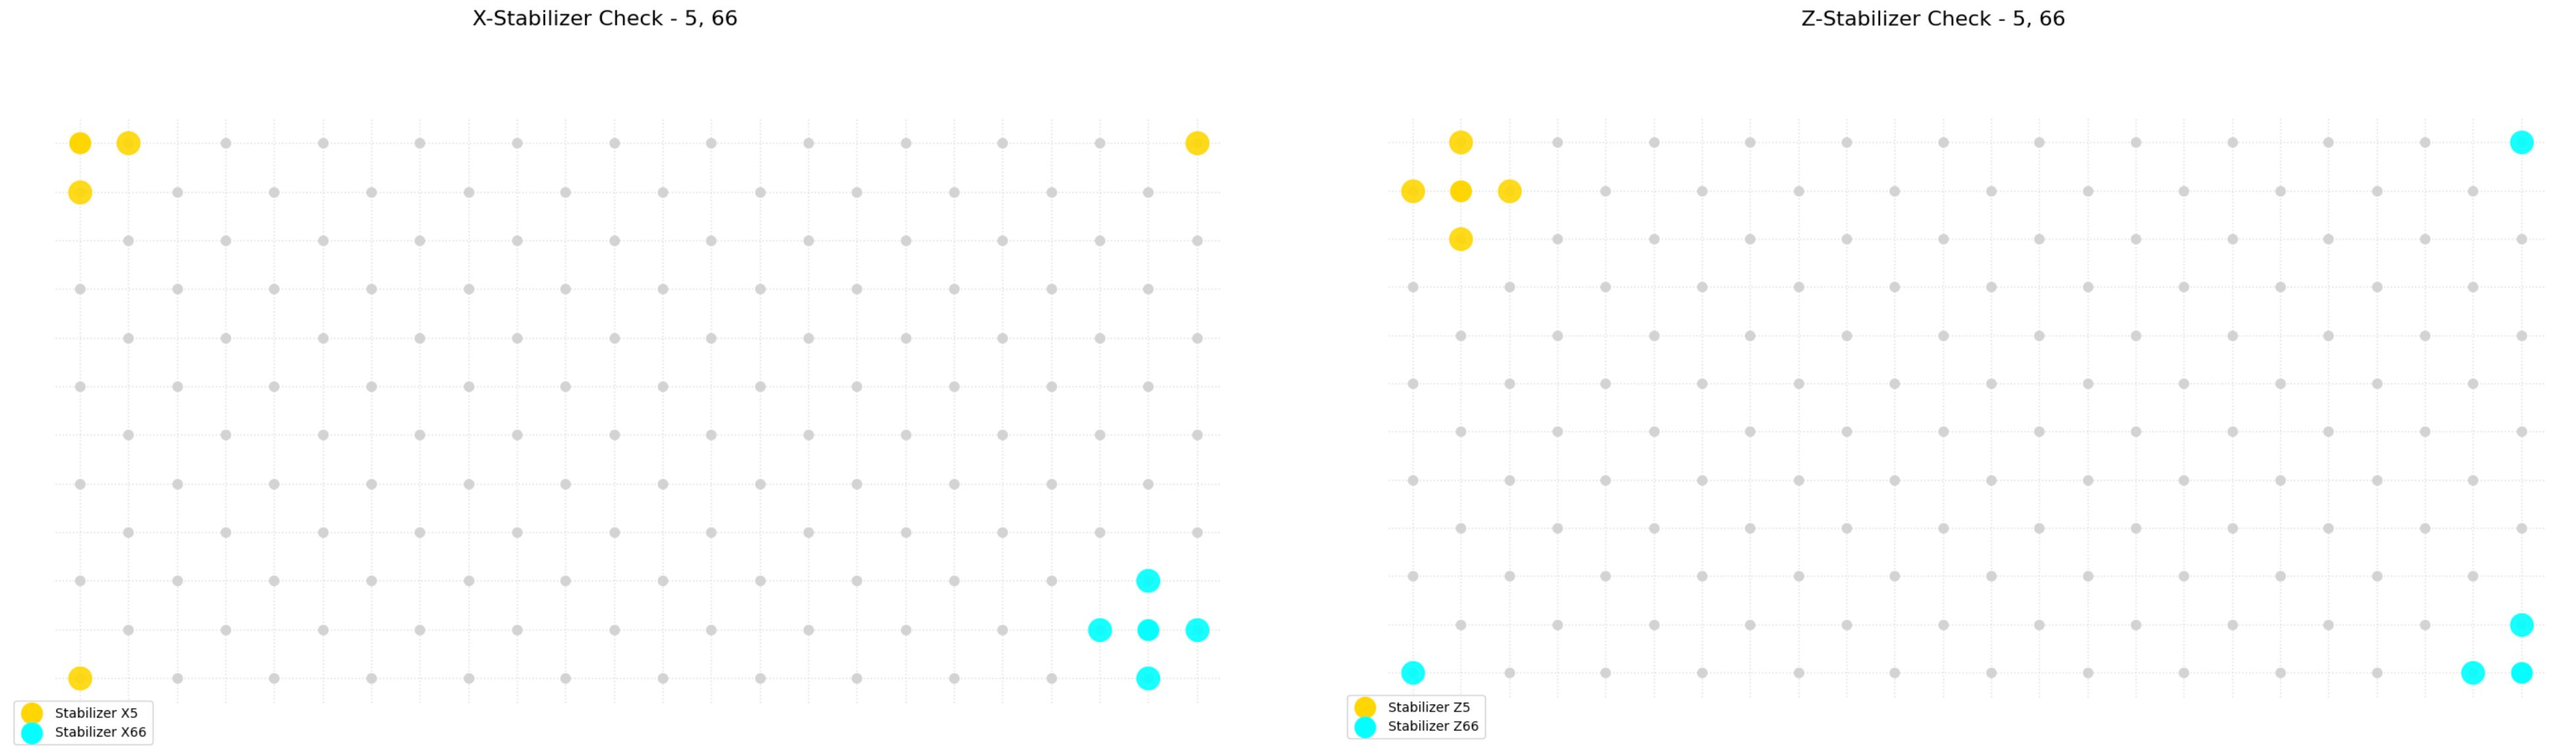

In [ ]:
# Some helpful code to start Exercise 4.


# We will define the parity check matrices for the toric code
HXtc = np.zeros((72, 144),dtype=int) # initializing the matrices
HZtc = np.zeros((72, 144),dtype=int)

# We will ask you to modify the matrices by adding 1s in appropriate places
# As an example, we will show how to do so for the first few rows of the toric code


# ---- TODO : Task 4 ---
# Write code to calculate HXtc and HZtc

# 0-th stabilizer
HXtc[0][0] = 1
HXtc[0][1] = 1
HXtc[0][72] = 1
HXtc[0][138] = 1

# 1-st stabilizer
HXtc[1][1] = 1
HXtc[1][2] = 1
HXtc[1][73] = 1
HXtc[1][139] = 1

# 2-nd stabilizer
HXtc[2][2] = 1
HXtc[2][3] = 1
HXtc[2][74] = 1
HXtc[2][140] = 1

# 3-rd stabilizer
HXtc[3][3] = 1
HXtc[3][4] = 1
HXtc[3][75] = 1
HXtc[3][141] = 1

# 4-th stabilizer
HXtc[4][4] = 1
HXtc[4][5] = 1
HXtc[4][76] = 1
HXtc[4][142] = 1

# 5-th stabilizer
HXtc[5][5] = 1
HXtc[5][np.mod(6,6)] = 1
HXtc[5][72 + 5] = 1
HXtc[5][72 + 6*np.mod(-1,12) + 5] = 1

# The last definition suggested a general rule for finding the appropriate locations to place 1s
# HXtc[j][j] = 1
# HXtc[j][6*np.floor(j/6) + np.mod(j+1,6)]
# HXtc[j][j+72] = 1
# HXtc[j][72 + 6*np.mod(np.floor(j/6)-1,12) + np.mod(j,6)]

# Write a loop over j from 0 to 143 to set all of the rows.

# Inspired from this, write a similar loop for the Z parity check matrices and complete HXtc and HZtc

HZtc[0][0] = 1
HZtc[0][6] = 1
HZtc[0][72] = 1
HZtc[0][77] = 1





# --- End of TODO ---

In [ ]:
# Check the connectivity of HXtc and HZtc

from lab4_util import generate_stabilizer_plots
generate_stabilizer_plots(HXtc, HZtc)

In [ ]:
Primeiro, complete `measure_steane_syndrome` preparando todos os estabilizadores do código Steane.

<div class="alert alert-block alert-warning">
<b>Para obter uma resposta correta</b>

Se você executar o circuito abaixo em um backend real, pode não conseguir obter os códigos de erro com precisão devido a vários erros injetados nos qubits. Portanto, execute o código a seguir usando um backend simulador.

</div>

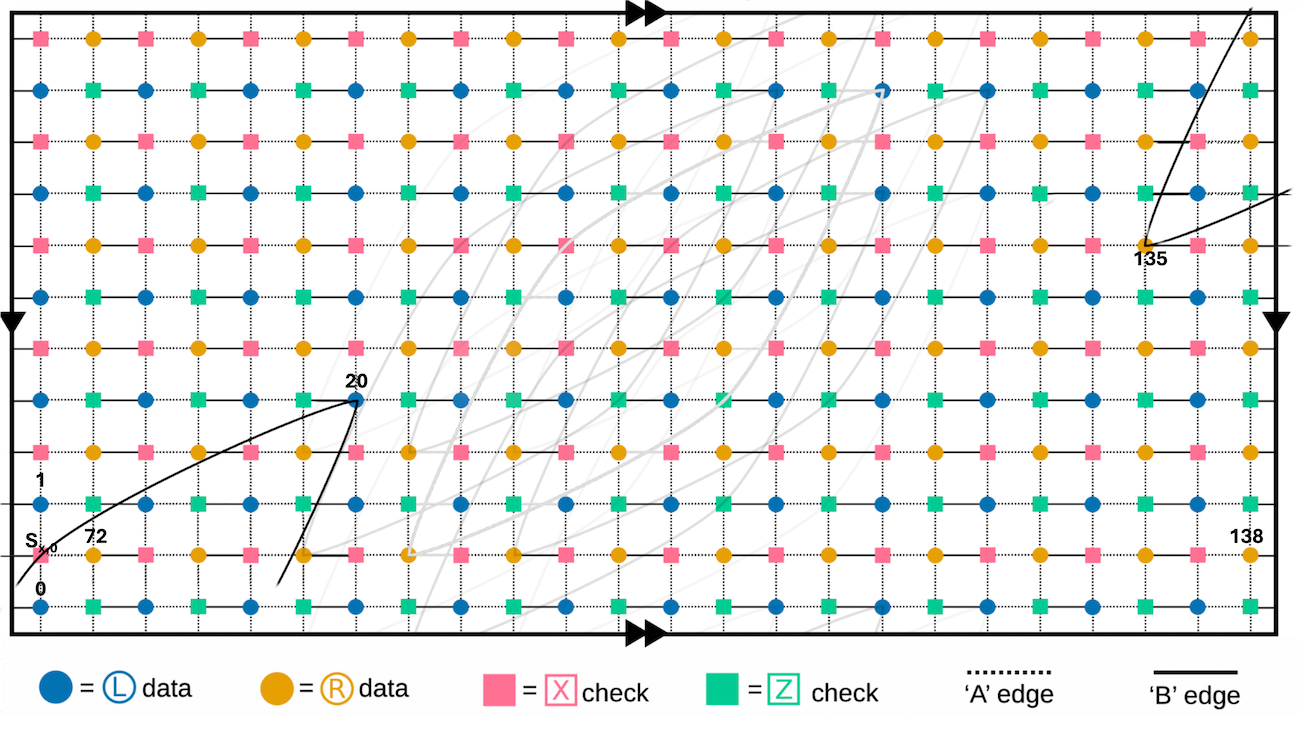

#### HX
1. Nearest-Neighbor Connections (from Toric Code):
As established in Section 3.3, this bottom-leftmost red square has nearest-neighbor connections to:
* Blue data qubit at index $\mathbf{0}$ (visualized as "below" or part of the square, blue column 0, row 0).
* Blue data qubit at index $\mathbf{1}$ (visualized as "above" or part of the square, blue column 0, row 1).
* Orange data qubit at index $\mathbf{72}$ (visualized as "to the right" or part of the square, orange column 0, row 0).
* Orange data qubit at index $\mathbf{138}$ (visualized as "to the left" across periodic boundary, orange column 11, row 0).

2. Additional Long-Range Connections (Specific to this Gross Code instance):
The problem states that for this particular gross code construction, the bottom-leftmost red square ($c_s=0, r_s=0$) will have two additional long-range connections:

* First long-range connection: To the blue data qubit 20.
    * The text describes this as "the blue qubit three rows above and six columns to the right." The specific rules of the gross code define how these relative positions map to a precise qubit index on the torus. For this stabilizer, this rule results in a connection to blue data qubit with global index $\mathbf{20}$.

* Second long-range connection: To the orange data qubit 135.
    * The text describes this as "the orange qubit three columns to the left and six rows down (recall the periodic boundary conditions)." Again, these relative descriptions are specific to the gross code's connection rules for this stabilizer, resulting in a connection to orange data qubit with global index $\mathbf{135}$.

3. Resulting First Row of $H_X$ for the Gross Code:
Combining both nearest-neighbor and the two specified long-range connections, the bottom-leftmost X-stabilizer now acts on data qubits with indices: `0, 1, 20, 72, 135, 138`.

Portanto, a primeira linha da matriz $H_X$ para este código gross (um vetor binário de 144 elementos) terá '1's nestas seis posições e '0's nos outros lugares. Vamos verificar isso contra o trecho fornecido:

**Snippet:**

```
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
```

Isso confirma que o trecho para a primeira linha de $H_X$ para o código gross tem exatamente seis '1's nos índices globais de qubits de dados 0, 1, 20, 72, 135 e 138, correspondendo à combinação de vizinhos mais próximos e as conexões de longo alcance especificadas.

#### HZ

To find the $H_Z$, please revisit the Tanner graph, and take a close look at the `leaf` shape of the long-range connection. 

1. Nearest-Neighbor Connections (from Toric Code):
As established in Section 3.3, this bottom-leftmost red square has nearest-neighbor connections to:
* Orange data qubit at index $\mathbf{77}$ (visualized as "to the below" across periodic boundary, orange column 0, row 5).
* Orange data qubit at index $\mathbf{72}$ (visualized as "above" or part of the square, orange column 0, row 0).
* Blue data qubit at index $\mathbf{6}$ (visualized as "to the right" or part of the square, blue column 1, row 0).
* Blue data qubit at index $\mathbf{0}$ (visualized as "to the left" or part of the square, blue column 0, row 0).

2. Additional Long-Range Connections (Specific to this Gross Code instance):

* First long-range connection: To the blue data qubit 15.
    * The text describes this as "the blue qubit six rows above and three columns to the right." The specific rules of the gross code define how these relative positions map to a precise qubit index on the torus. For this stabilizer, this rule results in a connection to blue data qubit with global index $\mathbf{15}$.

* Second long-range connection: To the orange data qubit 130.
    * The text describes this as "the orange qubit six columns to the left and three rows down (recall the periodic boundary conditions)." Again, these relative descriptions are specific to the gross code's connection rules for this stabilizer, resulting in a connection to orange data qubit with global index $\mathbf{130}$.

3. Resulting First Row of $H_Z$ for the Gross Code:
Combining both nearest-neighbor and the two specified long-range connections, the bottom-leftmost X-stabilizer now acts on data qubits with indices: `0, 6, 15, 72, 77, 130`.



**Snippet:**

```
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
```

Isso confirma que o trecho para a primeira linha de $H_Z$ para o código gross tem exatamente seis '1's nos índices globais de qubits de dados 0, 6, 15, 72, 77 e 130, correspondendo à combinação de vizinhos mais próximos e as conexões de longo alcance especificadas.

Este processo de adicionar duas conexões específicas de longo alcance seria repetido para *cada* estabilizador (tanto tipo X dos quadrados vermelhos quanto tipo Z dos quadrados verdes) para transformar as matrizes do código tórico nas matrizes do código gross. As regras exatas para determinar os parceiros de longo alcance para outros estabilizadores seguiriam um padrão consistente definido pela construção do código gross nesta rede.

<div class="alert alert-block alert-success">
<b>Exercise 5: Find the parity check matrices of the gross code </b>

Seguindo a convenção de rotulação acima, construa a matriz de verificação de paridade para o código gross, isto é, incluindo as conexões de longo alcance. Forneça o resultado para os estabilizadores $X$ no array numpy rotulado $H_{X}$ e similarmente para os estabilizadores $Z$ em um array rotulado $H_{Z}$.

**Dica**: Note a estrutura periódica dos exemplos acima. Isso pode ser usado a seu favor para criar um código eficiente para gerar as matrizes? Cada linha deve ter peso-6 - isto é, conter seis 1s.

</div>

<div class="alert alert-block alert-info">
    
<b> Check the connectivity using a helper function! </b>

Like exerciese 4 after finish compose `HXgc` and `HZgc`, execute the provided code to verify the connectivity of the 5th stabilizer of HXtc and the 66th stabilizer. Please focus on carefully checking the boundary conditions. Success is indicated by generating a graph that matches the following example.

``` python

from lab4_util import generate_stabilizer_plots
generate_stabilizer_plots(HXgc, HZgc)

```

</div>

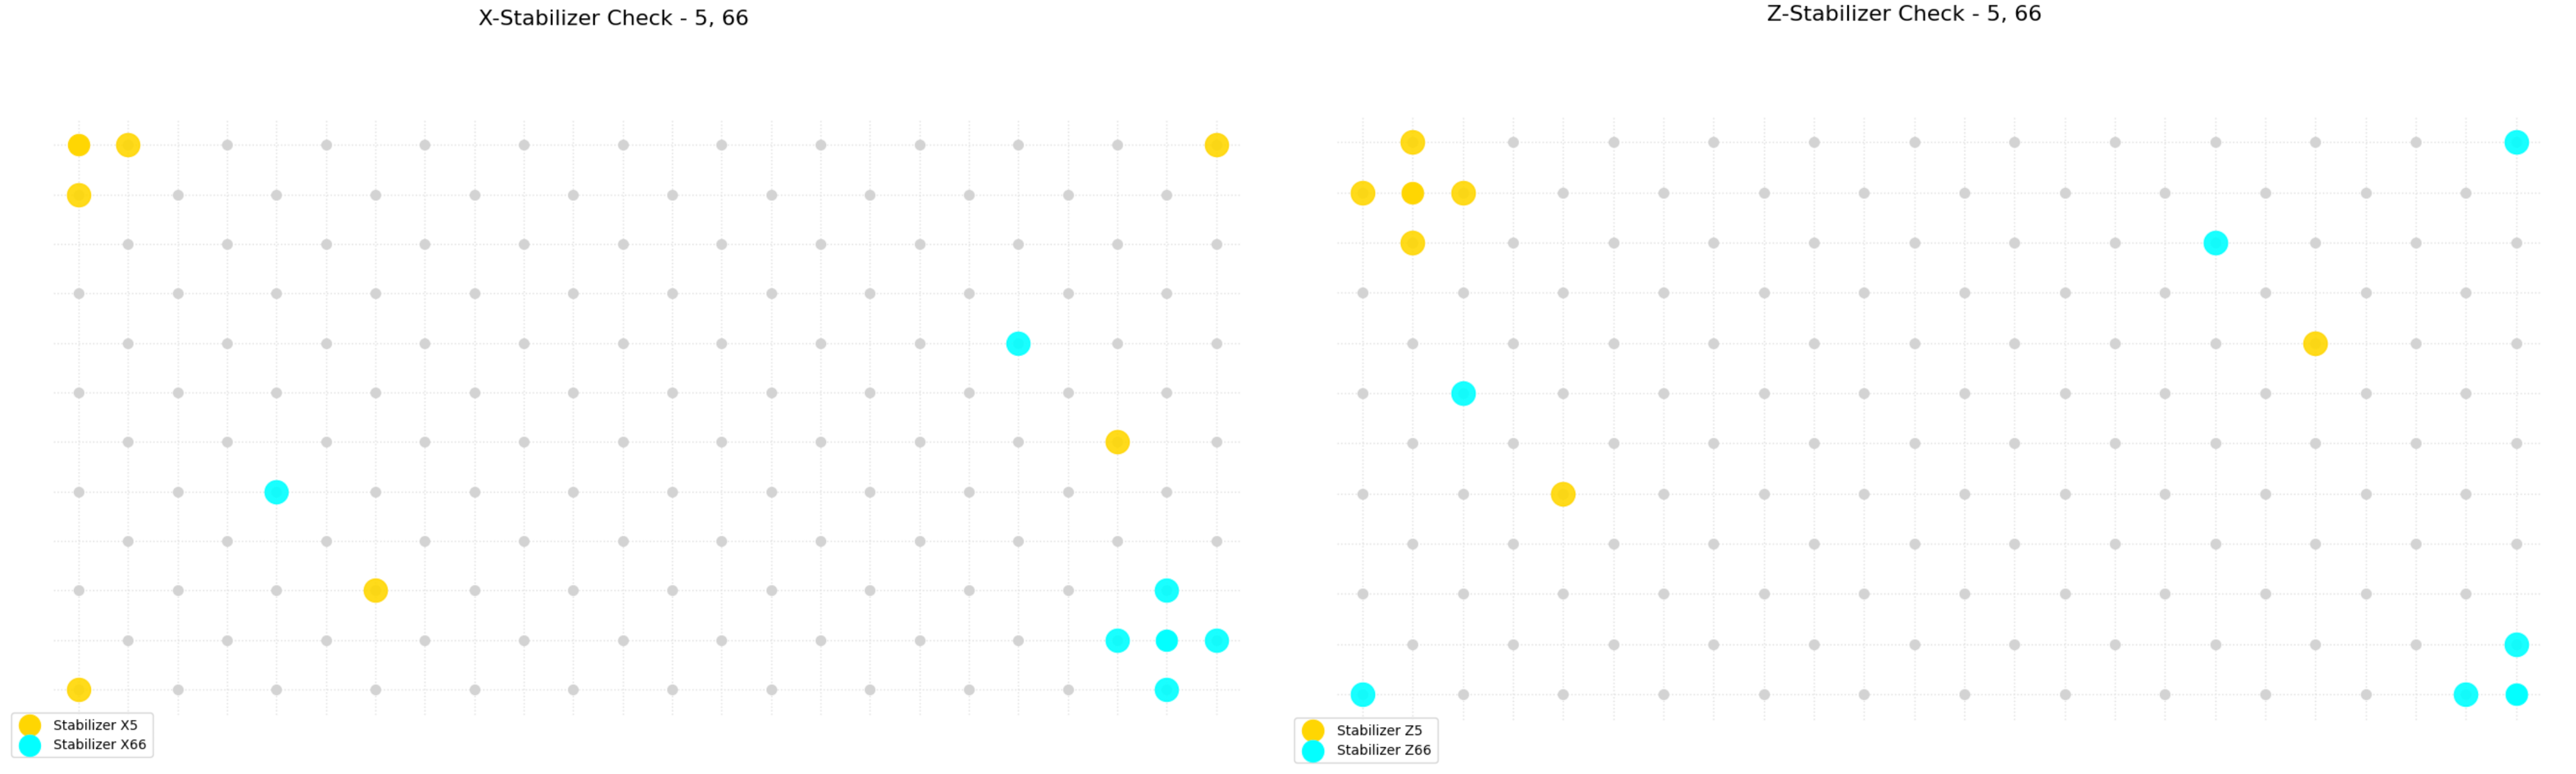

In [ ]:
# We will define the parity check matrices for the gross code
HXgc = np.zeros((72,144),dtype=int) # initializing the matrices
HZgc = np.zeros((72,144),dtype=int)
# ---- TODO : Task 5 ---
# Write code to calculate HXgc and HZgc

# 0-th X stabilizer
HXgc[0][0] = 1
HXgc[0][1] = 1
HXgc[0][20] = 1
HXgc[0][72] = 1
HXgc[0][135] = 1
HXgc[0][138] = 1


# 0-th Z stabilizer
HZgc[0][0] = 1
HZgc[0][6] = 1
HZgc[0][15] = 1
HZgc[0][72] = 1
HZgc[0][77] = 1
HZgc[0][130] = 1





# --- End of TODO ---

In [ ]:
#Check stabilizer

generate_stabilizer_plots(HXgc, HZgc)

In [ ]:
# Submit your answer using following code
grade_lab4_ex5(HXgc, HZgc)

## 3.5 Counting the Number of Logical Qubits

The parity check matrices you've been working with, $H_X$ and $H_Z$, are constructed from the stabilizers of the code. Each row in these matrices represents a generator of the stabilizer group. However, it's possible that some of these chosen generators are not independent; one stabilizer generator might be a product of others. Redundant generators don't add new constraints to define the codespace.

To find the actual number of independent stabilizer generators, we calculate the **rank** of these parity check matrices. Since we are dealing with qubits and Pauli operators (which square to identity and whose effects are often considered over GF(2) in the context of their binary representation), all matrix operations for rank calculation are performed modulo 2. The rank tells us the true number of unique conditions imposed by the stabilizers.

In general, for a quantum stabilizer code:
If $n$ is the number of physical data qubits used in the code, and $r$ is the total number of independent stabilizer generators, then the number of logical qubits ($k$) encoded by the code is given by:
$$k = n - r$$
Each independent stabilizer generator effectively halves the dimension of the Hilbert space, "fixing" one degree of freedom. Thus, $r$ independent stabilizers reduce the $2^n$-dimensional space of $n$ physical qubits to a $2^{n-r}$-dimensional codespace, which can then encode $k = n-r$ logical qubits.

Para códigos CSS, como os códigos tórico e gross que estamos considerando, os estabilizadores X e os estabilizadores Z formam dois grupos distintos e comutantes. Isso nos permite contar seus geradores independentes separadamente.
If $r_X$ is the number of independent X-stabilizers (obtained from the rank of the matrix whose rows are the X-stabilizer generators, which you've labeled $H_X$ from red squares) and $r_Z$ is the number of independent Z-stabilizers (obtained from the rank of the matrix whose rows are the Z-stabilizer generators, labeled $H_Z$ from green squares), then the number of logical qubits in the CSS code is:
$$k = n - r_X - r_Z$$
Esta fórmula vale porque os estabilizadores X e os estabilizadores Z são escolhidos de tal forma que todos comutam entre si, e o número total de condições independentes impostas ao espaço de código é a soma das condições independentes do tipo X e do tipo Z.



<div class="alert alert-block alert-success">
<b>Exercise 6: Count the number of logicals for the toric and gross codes</b>

Agora você usará a função `matrixRank` para determinar o número de qubits lógicos tanto para o código tórico quanto para o código gross que você construiu nos Exercícios 4 e 5.

1.  Import the function: Start by importing the `matrixRank` function using the command:
    `from lab4_util import matrixRank`
    Esta função calcula o posto de uma matriz binária (aqui `HXtc`, `HZtc`, `HXgc` e `HZgc`), que é exatamente o que precisamos para nossas matrizes de verificação de paridade.

2.  Calculate Ranks:
    * For the toric code, use `matrixRank` to find the rank of $H_X$ (the matrix of X-stabilizers you generated from red squares in Exercise 4) – this will give you $r_{X, \text{toric}}$.
    * Similarly, find the rank of $H_Z$ (the matrix of Z-stabilizers from green squares in Exercise 4) – this will give you $r_{Z, \text{toric}}$.
    * Repeat this process for the gross code matrices ($H_X$ and $H_Z$) you generated in Exercise 5 to find $r_{X, \text{gross}}$ and $r_{Z, \text{gross}}$.

3.  Calculate Logical Qubits ($k$):
    * Using the formula $k = n - r_X - r_Z$ (where $n=144$ is the total number of data qubits), calculate the number of logical qubits for the toric code ($k_{\text{toric}}$).
    * Perform the same calculation for the gross code ($k_{\text{gross}}$).

**Avaliação**: Submeta o número calculado de qubits lógicos ($k$) tanto para o código tórico quanto para o código gross (`k_toric` e `k_gross`). Você pode verificar seu resultado do código tórico contra o fato conhecido de que ele codifica $k=2$ qubits lógicos.
</div>

In [ ]:
# ---- TODO : Task 6 ---
# Write code to calculate k_toric and k_gross
# Hint: You can use the matrixRank imported from lab4_utils

#toric code
rx_toric =
rz_toric=
k_toric = 

# gross code
rx_gross=
rz_gross=
k_gross = 
# --- End of TODO ---

In [ ]:
# Submit your answer using following code
grade_lab4_ex6(k_toric, k_gross)

## 3.6 Concluding remarks: The power of the connectivity

These exercises demonstrate a key principle in Quantum Error Correction: strategic modifications to a code's underlying structure, such as introducing long-range connections, can significantly enhance its performance.

The construction of parity check matrices for both the toric-like and gross-like codes on the identical $144$-data-qubit framework has been completed. Your calculations in Exercise 6 for the number of logical qubits ($k$) illustrate how these differing connectivities influence $k_{\text{gross}}$ relative to the standard $k_{\text{toric}}$.

No entanto, uma vantagem mais pronunciada da variante do código gross é evidente em sua **distância do código ($d$)**, um parâmetro crítico que determina sua força de correção de erros. Embora cálculos detalhados de distância estejam além do escopo imediato deste laboratório, para as instâncias de código acima, o código tórico teria distância 6 (pois a periodicidade ao longo de uma das direções é 6 espaçamentos de rede em termos do número de qubits de dados) - no entanto, o código gross teria distância 12! 


This substantial improvement in error correction capability, achieved by adding specific long-range connections, underscores the impact of such structural modifications on code performance, particularly in enhancing protection against errors. This highlights a valuable strategy in the design of advanced quantum codes.

In [ ]:
# Check your submission status with the code below
from qc_grader.grader.grade import check_lab_completion_status

check_lab_completion_status("qgss_2025")

Como no exercício 4, após terminar de compor `HXgc` e `HZgc`, execute o código fornecido para verificar a conectividade do 5º estabilizador de HXtc e do 66º estabilizador. Concentre-se em verificar cuidadosamente as condições de contorno. O sucesso é indicado pela geração de um gráfico que corresponde ao exemplo a seguir.